In [20]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
import numpy as np
import calendar
from helpers import *
from thermal_optimal_path.lattice import partition_function
from thermal_optimal_path.statistics import average_path
from strategies import basic_strategy_old
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [21]:
import numpy as np
from helpers import *
import pandas as pd

In [22]:
year = 2024
month = 1
day = 16
crypto1 = 'BTC'
crypto2 = 'ETH'

crypto1_path = f'../data/{crypto1}USDT/{crypto1}USDT-1s-{year}-{month:02d}-{day:02d}.parquet'
crypto2_path = f'../data/{crypto2}USDT/{crypto2}USDT-1s-{year}-{month:02d}-{day:02d}.parquet'
lead_lag_path = f'../data/{crypto1}-{crypto2}/{crypto1}-{crypto2}-metrics-{year}-{month:02d}-{day:02d}.parquet'

In [23]:
crypto1_data = pd.read_parquet(crypto1_path)
crypto1_data.head()

Open time      Open
0  1705363200000  42511.10
1  1705363201000  42511.10
2  1705363202000  42511.10
3  1705363203000  42510.00
4  1705363204000  42510.01

In [24]:
crypto2_data = pd.read_parquet(crypto2_path)
crypto2_data.head()

Open time     Open
0  1705363200000  2511.79
1  1705363201000  2511.77
2  1705363202000  2511.77
3  1705363203000  2511.51
4  1705363204000  2511.51

In [25]:
lead_lag_data = pd.read_parquet(lead_lag_path)

In [28]:
crypto1_prices = crypto1_data['Open']
crypto2_prices = crypto2_data['Open']
df_avg = lead_lag_data['avg']

# btc_returns = btc_prices.pct_change().rolling(window=5).mean()[5:]
# eth_returns = eth_prices.pct_change().rolling(window=5).mean()[5:]

crypto1_returns = crypto1_prices.pct_change().rolling(window=5).mean()[5:]
crypto2_returns = crypto2_prices.pct_change().rolling(window=5).mean()[5:]

strategy_result = basic_strategy_old(
    crypto1_prices[5:], 
    crypto1_returns, 
    crypto2_prices[5:], 
    crypto2_returns, 
    df_avg,
    40
)

Total: 82796, valid_start_idx: 3599
Long at 42692.69
Sold at 42696.55
Short at 2516.86
i: 213, crypto2_entry_price_short: 2516.86, crypto2_price: 2516.86
Bought back at 2517.2
Long at 42715.78
Sold at 42723.42
Short at 2519.33
i: 500, crypto2_entry_price_short: 2519.33, crypto2_price: 2519.33
Bought back at 2518.81
Long at 2518.8
Sold at 2519.04
Long at 2518.51
Sold at 2518.36
Short at 2518.36
i: 969, crypto2_entry_price_short: 2518.36, crypto2_price: 2518.36
Bought back at 2518.01
Short at 2514.44
i: 1844, crypto2_entry_price_short: 2514.44, crypto2_price: 2514.44
Bought back at 2514.3
Short at 2510.21
i: 2161, crypto2_entry_price_short: 2510.21, crypto2_price: 2510.21
Bought back at 2510.02
Long at 2507.39
Sold at 2507.58
Long at 2518.15
Sold at 2518.36
Long at 2520.89
Sold at 2521.39
Long at 42671.1
Sold at 42674.22
Long at 2521.03
Sold at 2521.29
Short at 2521.18
i: 4584, crypto2_entry_price_short: 2521.18, crypto2_price: 2521.18
Bought back at 2521.4
Short at 42646.02
i: 6100, cry

In [30]:
df_avg[base_time:end_time]

45651    4.041092
45652    4.520602
45653    4.942801
45654    5.323536
45655    5.744216
           ...   
45846    1.179917
45847    0.931840
45848    0.652849
45849    0.355140
45850   -0.033986
Name: avg, Length: 200, dtype: float64

In [8]:
valid_start_idx = 3600
i = 930
base_time = valid_start_idx + i

interest_time = valid_start_idx + 1108
print(f"interest: {interest_time}")

interest: 4708


<Axes: >

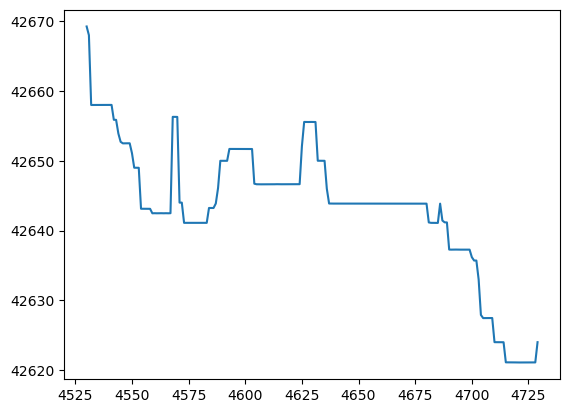

In [9]:
crypto1_prices[base_time:base_time + 200].plot()

<Axes: >

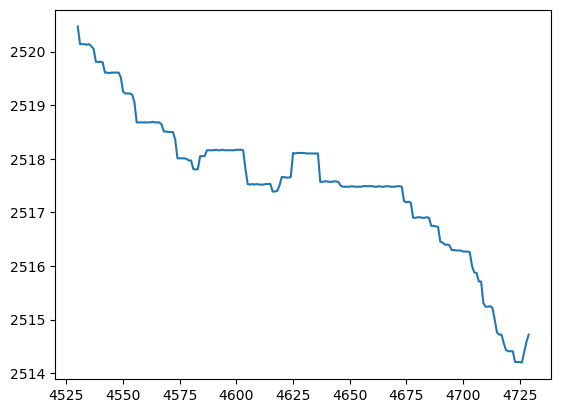

In [10]:
crypto2_prices[base_time:base_time + 200].plot()

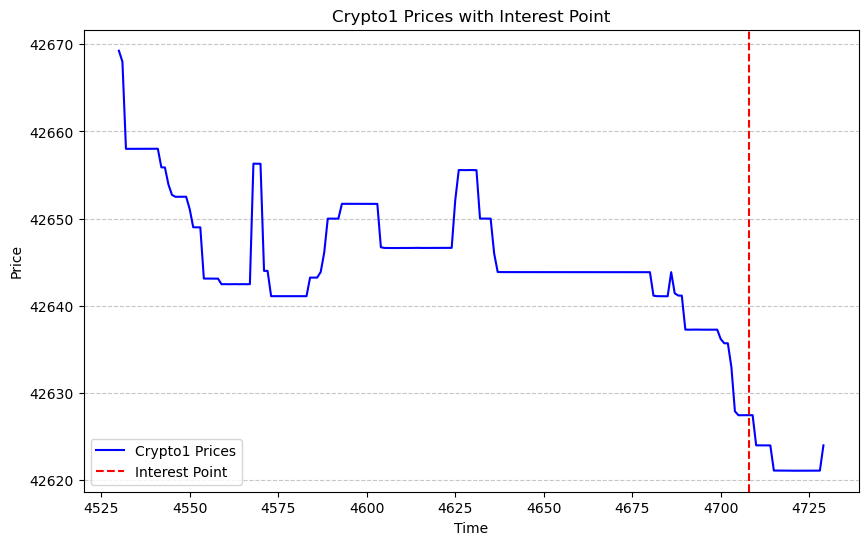

In [11]:
plt.figure(figsize=(10, 6))
crypto1_prices[base_time:base_time + 200].plot(label="Crypto1 Prices", color="blue")

# Adding a vertical red line at interest_time
plt.axvline(x=crypto1_prices.index[interest_time], color="red", linestyle="--", label="Interest Point")

# Adding labels and legend
plt.title("Crypto1 Prices with Interest Point")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

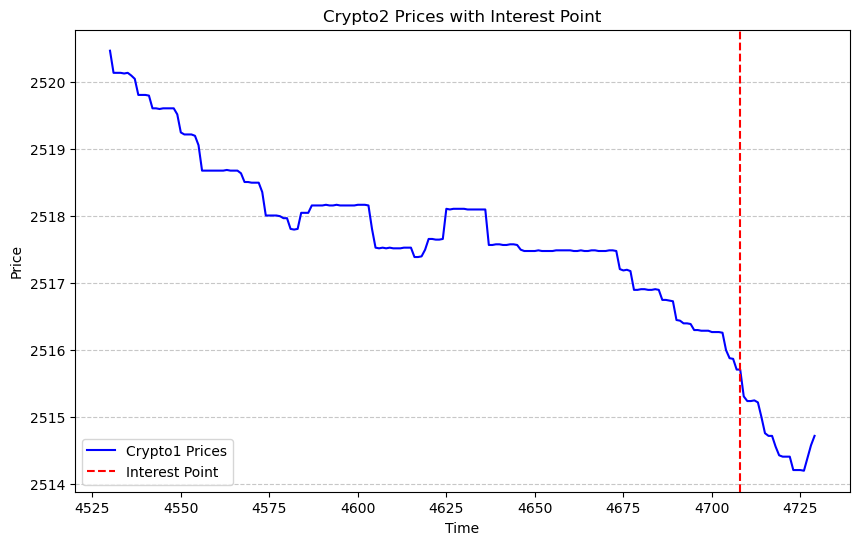

In [12]:
plt.figure(figsize=(10, 6))
crypto2_prices[base_time:base_time + 200].plot(label="Crypto1 Prices", color="blue")

# Adding a vertical red line at interest_time
plt.axvline(x=crypto2_prices.index[interest_time], color="red", linestyle="--", label="Interest Point")

# Adding labels and legend
plt.title("Crypto2 Prices with Interest Point")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
log_text_1 = """
Total: 82796, valid_start_idx: 3599
Long at 42692.69
Sold at 42696.55
Short at 2516.86
i: 213, crypto2_entry_price_short: 2516.86, crypto2_price: 2516.86
Bought back at 2517.2
Long at 42715.78
Sold at 42723.42
Short at 2519.33
i: 500, crypto2_entry_price_short: 2519.33, crypto2_price: 2519.33
Bought back at 2518.81
Long at 2518.8
Sold at 2519.04
Long at 2518.51
Sold at 2518.36
Short at 2518.36
i: 969, crypto2_entry_price_short: 2518.36, crypto2_price: 2518.36
Bought back at 2518.01
Short at 2514.44
i: 1844, crypto2_entry_price_short: 2514.44, crypto2_price: 2514.44
Bought back at 2514.3
Short at 2510.21
i: 2161, crypto2_entry_price_short: 2510.21, crypto2_price: 2510.21
Bought back at 2510.02
Long at 2507.39
Sold at 2507.58
Long at 2518.15
Sold at 2518.36
Long at 2520.89
Sold at 2521.39
Long at 42671.1
Sold at 42674.22
Long at 2521.03
Sold at 2521.29
Short at 2521.18
i: 4584, crypto2_entry_price_short: 2521.18, crypto2_price: 2521.18
Bought back at 2521.4
Short at 42646.02
i: 6100, crypto1_entry_price_short: 42646.02, crypto1_price: 42646.02
BLABLABA
Long at 2526.24
Sold at 2526.09
Long at 42846.31
Sold at 42842.64
Short at 2535.46
i: 10911, crypto2_entry_price_short: 2535.46, crypto2_price: 2535.46
Bought back at 2535.31
Long at 2534.31
Sold at 2535.05
Short at 42899.21
i: 11118, crypto1_entry_price_short: 42899.21, crypto1_price: 42899.21
Bought back at 42901.13
Short at 2531.12
i: 12706, crypto2_entry_price_short: 2531.12, crypto2_price: 2531.12
Bought back at 2530.97
Short at 42812.31
i: 13185, crypto1_entry_price_short: 42812.31, crypto1_price: 42812.31
Bought back at 42816.0
Short at 42797.38
i: 14133, crypto1_entry_price_short: 42797.38, crypto1_price: 42797.38
Bought back at 42787.08
Long at 2529.29
Sold at 2529.84
Short at 42812.57
i: 14630, crypto1_entry_price_short: 42812.57, crypto1_price: 42812.57
Bought back at 42809.95
Long at 42814.0
Sold at 42820.74
Short at 42866.08
i: 15793, crypto1_entry_price_short: 42866.08, crypto1_price: 42866.08
Bought back at 42862.74
Long at 2534.6
Sold at 2534.88
Short at 2535.5
i: 16343, crypto2_entry_price_short: 2535.5, crypto2_price: 2535.5
Bought back at 2535.39
Long at 2535.39
Sold at 2535.72
Short at 2536.53
i: 16475, crypto2_entry_price_short: 2536.53, crypto2_price: 2536.53
Bought back at 2536.37
Long at 2538.22
Sold at 2538.55
Long at 2537.55
Sold at 2537.72
Short at 2537.73
i: 16847, crypto2_entry_price_short: 2537.73, crypto2_price: 2537.73
Bought back at 2538.29
Long at 42908.41
Sold at 42906.37
Long at 42710.0
Sold at 42698.87
Short at 2529.28
i: 19046, crypto2_entry_price_short: 2529.28, crypto2_price: 2529.28
Bought back at 2529.39
Short at 2532.97
i: 20309, crypto2_entry_price_short: 2532.97, crypto2_price: 2532.97
Bought back at 2532.74
Long at 2532.69
Sold at 2532.09
Long at 42731.78
Sold at 42729.04
Long at 2533.31
Sold at 2533.18
Short at 2530.0
i: 22275, crypto2_entry_price_short: 2530.0, crypto2_price: 2530.0
Bought back at 2529.4
Long at 42638.0
Sold at 42639.34
Long at 42758.48
Sold at 42761.11
Long at 2533.48
Sold at 2533.03
Long at 42752.0
Sold at 42754.09
Short at 42748.81
i: 24920, crypto1_entry_price_short: 42748.81, crypto1_price: 42748.81
Bought back at 42750.0
Long at 42750.0
Short at 42750.0
i: 24944, crypto1_entry_price_short: 42750.0, crypto1_price: 42750.0
Sold at 42748.56
Bought back at 42748.56
Short at 42744.14
i: 24983, crypto1_entry_price_short: 42744.14, crypto1_price: 42744.14
Bought back at 42746.01
Short at 42794.24
i: 26905, crypto1_entry_price_short: 42794.24, crypto1_price: 42794.24
Bought back at 42800.0
Short at 2541.44
i: 28973, crypto2_entry_price_short: 2541.44, crypto2_price: 2541.44
Bought back at 2540.98
Long at 2541.81
Sold at 2542.13
Short at 2540.51
i: 29447, crypto2_entry_price_short: 2540.51, crypto2_price: 2540.51
Bought back at 2540.02
Long at 2544.55
Sold at 2544.01
Long at 2544.04
Sold at 2544.54
Long at 2544.15
Sold at 2544.46
Long at 2545.4
Sold at 2545.6
Short at 2546.47
i: 30215, crypto2_entry_price_short: 2546.47, crypto2_price: 2546.47
Bought back at 2546.62
Long at 43090.0
Sold at 43086.81
Long at 42951.1
Sold at 42953.99
Long at 42990.0
Sold at 42992.68
Short at 42999.99
i: 31984, crypto1_entry_price_short: 42999.99, crypto1_price: 42999.99
Bought back at 42996.51
Long at 43014.27
Sold at 43017.9
Short at 43029.99
i: 32165, crypto1_entry_price_short: 43029.99, crypto1_price: 43029.99
Bought back at 43024.42
Short at 2542.32
i: 32345, crypto2_entry_price_short: 2542.32, crypto2_price: 2542.32
Bought back at 2542.61
Short at 2540.92
i: 32523, crypto2_entry_price_short: 2540.92, crypto2_price: 2540.92
Bought back at 2540.59
Short at 42913.91
i: 33468, crypto1_entry_price_short: 42913.91, crypto1_price: 42913.91
Bought back at 42915.98
Long at 2536.93
Sold at 2536.68
Long at 42901.1
Sold at 42905.74
Short at 42866.0
i: 34077, crypto1_entry_price_short: 42866.0, crypto1_price: 42866.0
Bought back at 42868.69
Short at 42853.98
i: 34325, crypto1_entry_price_short: 42853.98, crypto1_price: 42853.98
Long at 42852.68
Sold at 42855.04
Bought back at 42859.03
Long at 2534.0
Sold at 2533.77
Long at 42931.5
Sold at 42933.64
Long at 2533.8
Sold at 2533.58
Short at 42820.01
i: 37776, crypto1_entry_price_short: 42820.01, crypto1_price: 42820.01
Bought back at 42829.67
Long at 2524.17
Sold at 2523.01
Short at 2532.41
i: 39822, crypto2_entry_price_short: 2532.41, crypto2_price: 2532.41
Bought back at 2532.57
Short at 2533.04
i: 40162, crypto2_entry_price_short: 2533.04, crypto2_price: 2533.04
BLABLABA
Short at 42901.11
i: 40862, crypto1_entry_price_short: 42901.11, crypto1_price: 42901.11
Bought back at 42896.17
Short at 2534.39
i: 41181, crypto2_entry_price_short: 2534.39, crypto2_price: 2534.39
Bought back at 2534.98
Long at 43086.0
Sold at 43082.56
Long at 43096.43
Sold at 43098.55
Short at 2541.32
i: 41785, crypto2_entry_price_short: 2541.32, crypto2_price: 2541.32
Bought back at 2541.46
Short at 43059.89
i: 42146, crypto1_entry_price_short: 43059.89, crypto1_price: 43059.89
Bought back at 43051.97
Short at 43056.0
i: 42269, crypto1_entry_price_short: 43056.0, crypto1_price: 43056.0
Bought back at 43062.0
Short at 43150.0
i: 43164, crypto1_entry_price_short: 43150.0, crypto1_price: 43150.0
Bought back at 43147.85
Long at 2538.21
Sold at 2537.89
Short at 2537.67
i: 45092, crypto2_entry_price_short: 2537.67, crypto2_price: 2537.67
Bought back at 2537.39
Short at 42926.0
i: 46015, crypto1_entry_price_short: 42926.0, crypto1_price: 42926.0
Bought back at 42932.89
Long at 42791.82
Sold at 42783.73
Long at 2517.1
Sold at 2516.54
Long at 2514.19
Sold at 2513.83
Short at 2504.78
i: 49235, crypto2_entry_price_short: 2504.78, crypto2_price: 2504.78
Bought back at 2504.4
Short at 2501.7
i: 49383, crypto2_entry_price_short: 2501.7, crypto2_price: 2501.7
Bought back at 2502.0
Short at 2500.98
i: 49453, crypto2_entry_price_short: 2500.98, crypto2_price: 2500.98
Long at 2501.0
Sold at 2500.4
Bought back at 2500.4
Long at 42100.0
Sold at 42093.48
Long at 42100.0
Sold at 42131.08
Long at 42170.82
Sold at 42158.01
Long at 42331.99
Sold at 42323.63
Long at 42373.99
Sold at 42369.53
Long at 42370.4
Sold at 42352.03
Short at 42364.0
i: 49851, crypto1_entry_price_short: 42364.0, crypto1_price: 42364.0
Bought back at 42358.12
Long at 42369.99
Sold at 42365.83
Long at 42993.73
Sold at 43004.99
Short at 43015.81
i: 51958, crypto1_entry_price_short: 43015.81, crypto1_price: 43015.81
Bought back at 43004.0
Long at 43001.51
Sold at 42992.17
Short at 2564.66
i: 54123, crypto2_entry_price_short: 2564.66, crypto2_price: 2564.66
Bought back at 2564.99
Short at 2565.13
i: 54138, crypto2_entry_price_short: 2565.13, crypto2_price: 2565.13
Bought back at 2565.47
Short at 2565.44
i: 54171, crypto2_entry_price_short: 2565.44, crypto2_price: 2565.44
Bought back at 2565.93
Short at 43029.99
i: 55171, crypto1_entry_price_short: 43029.99, crypto1_price: 43029.99
Bought back at 43035.02
Short at 43136.34
i: 58864, crypto1_entry_price_short: 43136.34, crypto1_price: 43136.34
Bought back at 43131.42
Long at 43048.0
Sold at 43044.59
Short at 43055.88
i: 62725, crypto1_entry_price_short: 43055.88, crypto1_price: 43055.88
Bought back at 43051.85
Short at 42967.14
i: 62919, crypto1_entry_price_short: 42967.14, crypto1_price: 42967.14
Bought back at 42970.55
Long at 2560.04
Sold at 2559.81
Long at 42967.99
Sold at 42964.01
Short at 43131.09
i: 66201, crypto1_entry_price_short: 43131.09, crypto1_price: 43131.09
Bought back at 43122.37
Short at 43137.99
i: 66340, crypto1_entry_price_short: 43137.99, crypto1_price: 43137.99
Bought back at 43129.36
Short at 43153.9
i: 68156, crypto1_entry_price_short: 43153.9, crypto1_price: 43153.9
Bought back at 43148.01
Short at 43180.0
i: 68251, crypto1_entry_price_short: 43180.0, crypto1_price: 43180.0
Bought back at 43173.88
Short at 43237.61
i: 69277, crypto1_entry_price_short: 43237.61, crypto1_price: 43237.61
Bought back at 43242.0
Long at 2584.77
Sold at 2585.41
Short at 2580.82
i: 69785, crypto2_entry_price_short: 2580.82, crypto2_price: 2580.82
Bought back at 2581.17
Short at 2591.72
i: 73336, crypto2_entry_price_short: 2591.72, crypto2_price: 2591.72
Bought back at 2592.39
Short at 2593.37
i: 73690, crypto2_entry_price_short: 2593.37, crypto2_price: 2593.37
Bought back at 2593.65
Long at 43438.7
Sold at 43443.99
Short at 43496.0
i: 74490, crypto1_entry_price_short: 43496.0, crypto1_price: 43496.0
Bought back at 43486.17
Short at 2603.89
i: 74507, crypto2_entry_price_short: 2603.89, crypto2_price: 2603.89
Bought back at 2603.41
Short at 2600.6
i: 74868, crypto2_entry_price_short: 2600.6, crypto2_price: 2600.6
Bought back at 2600.14
Long at 43434.85
Sold at 43438.0
Long at 2604.18
Sold at 2603.92
Short at 2596.87
i: 78156, crypto2_entry_price_short: 2596.87, crypto2_price: 2596.87
Bought back at 2596.26
Short at 43285.99
i: 79354, crypto1_entry_price_short: 43285.99, crypto1_price: 43285.99
Bought back at 43284.17
Short at 43265.62
i: 79542, crypto1_entry_price_short: 43265.62, crypto1_price: 43265.62
Bought back at 43261.56
Long at 2595.94
Sold at 2595.73
Short at 43155.99
i: 82090, crypto1_entry_price_short: 43155.99, crypto1_price: 43155.99
Bought back at 43150.51
Total money after strategy: Base amount + 0.0014275386301385584, Long trades: 68, Short trades: 72, Long returns: -0.00046575827333739106, Short returns: 2.001912486479595
"""

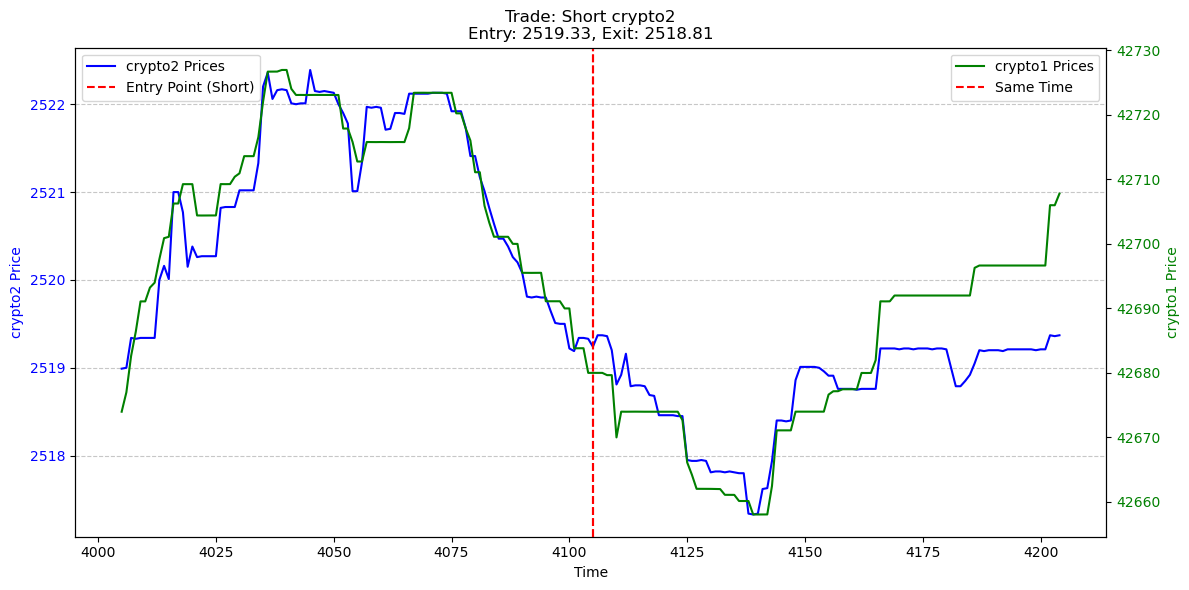

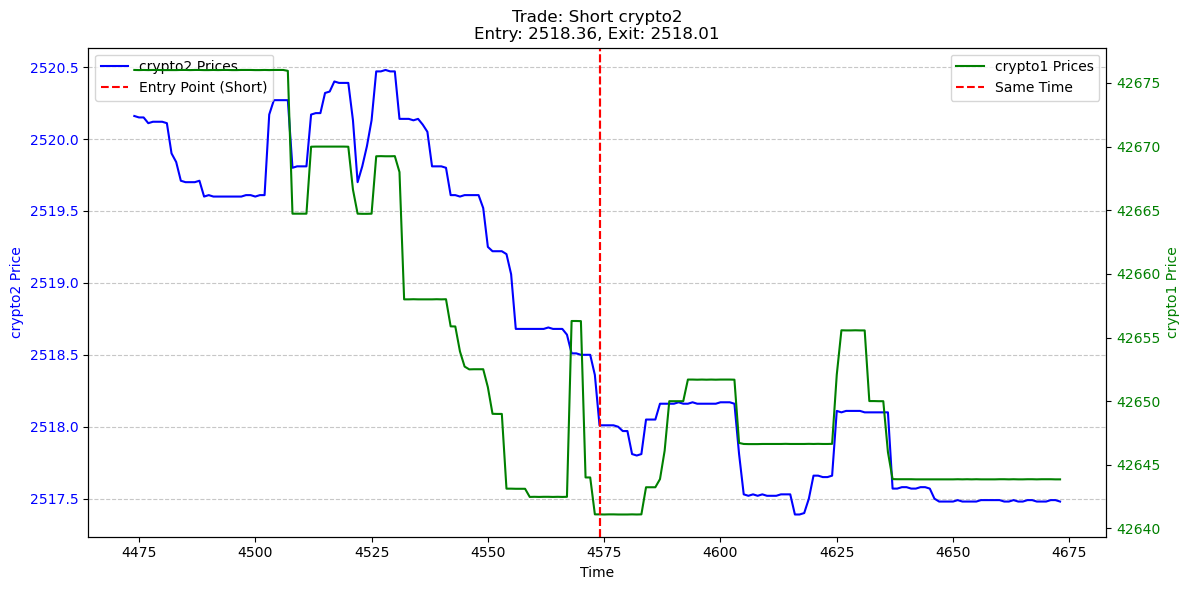

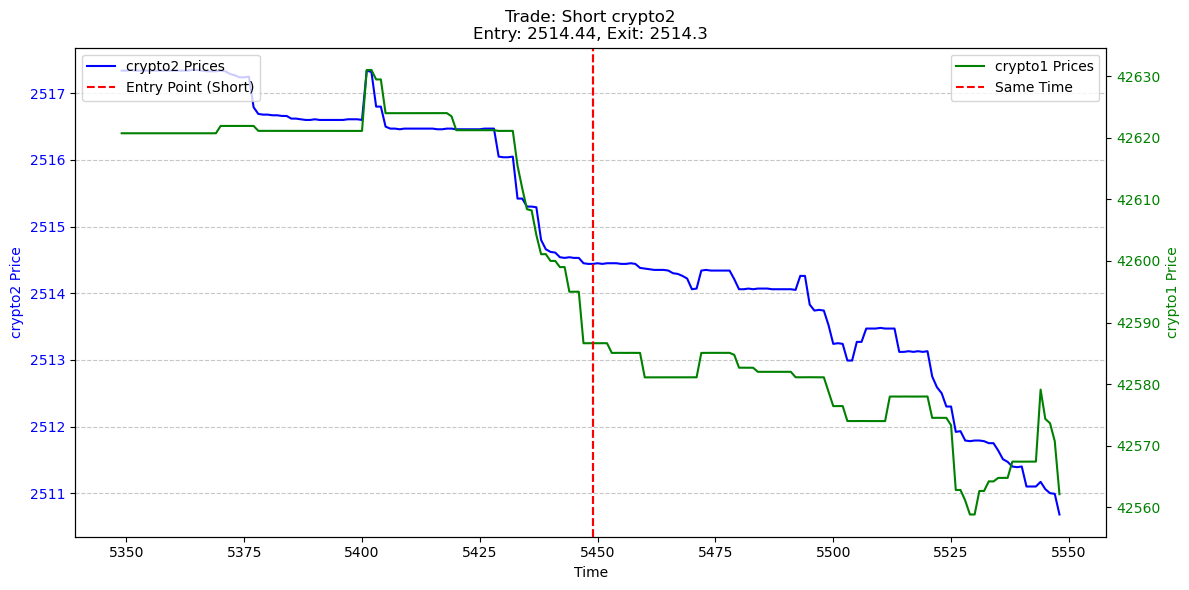

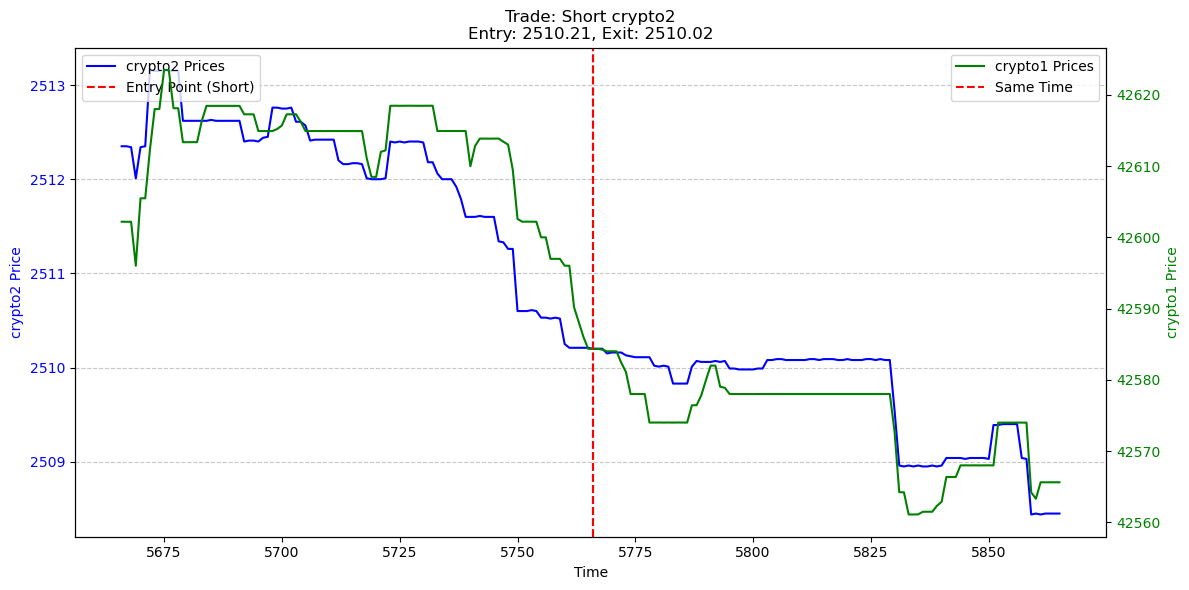

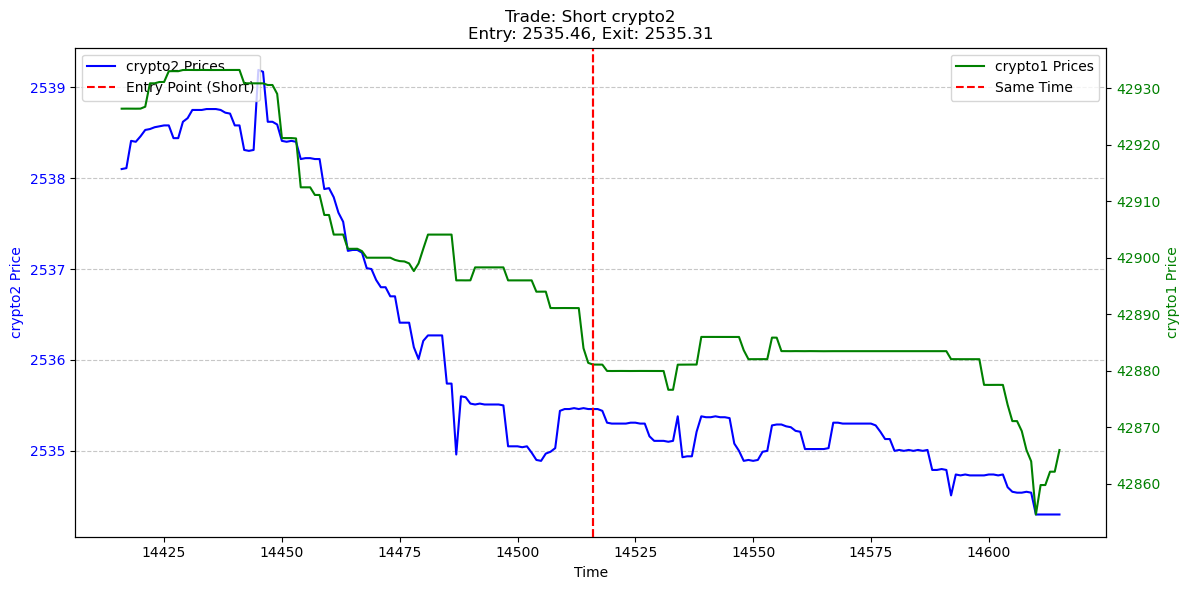

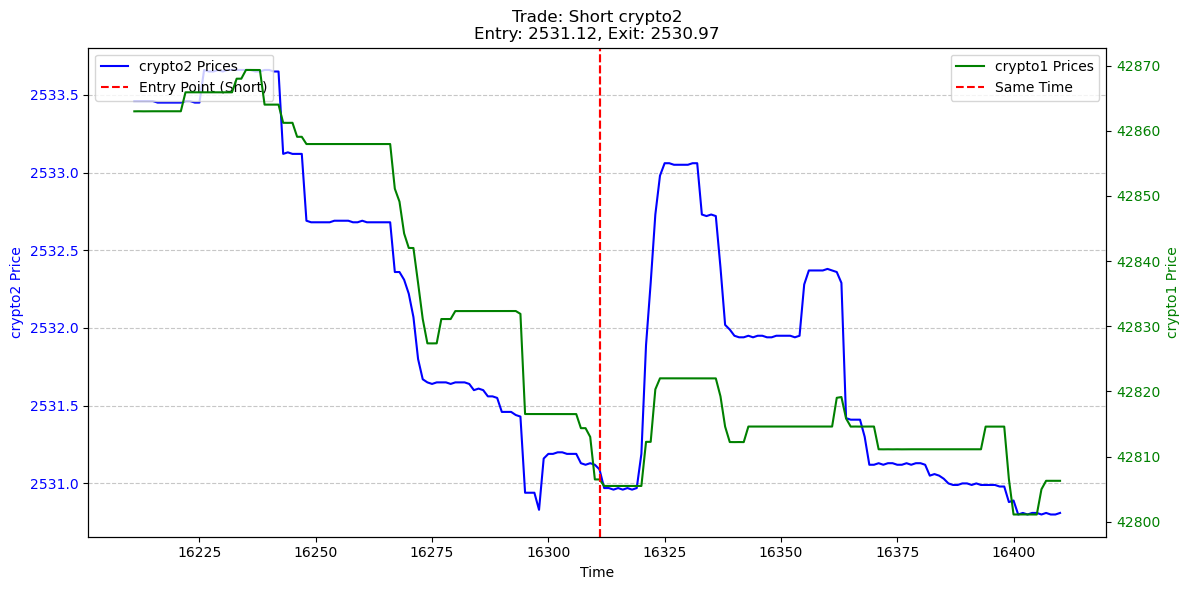

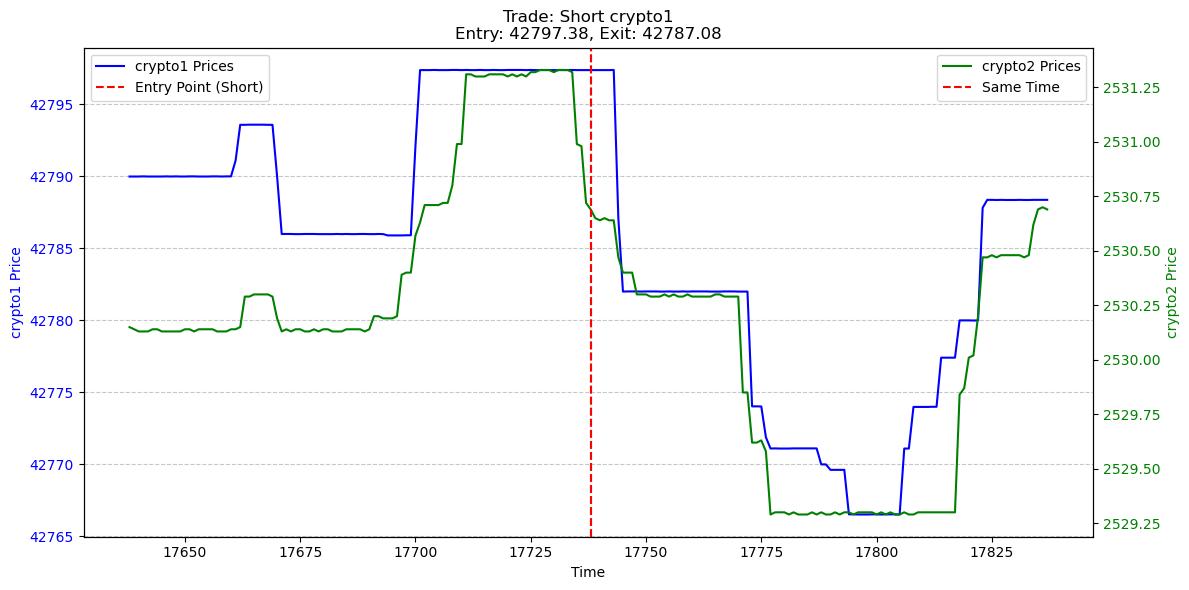

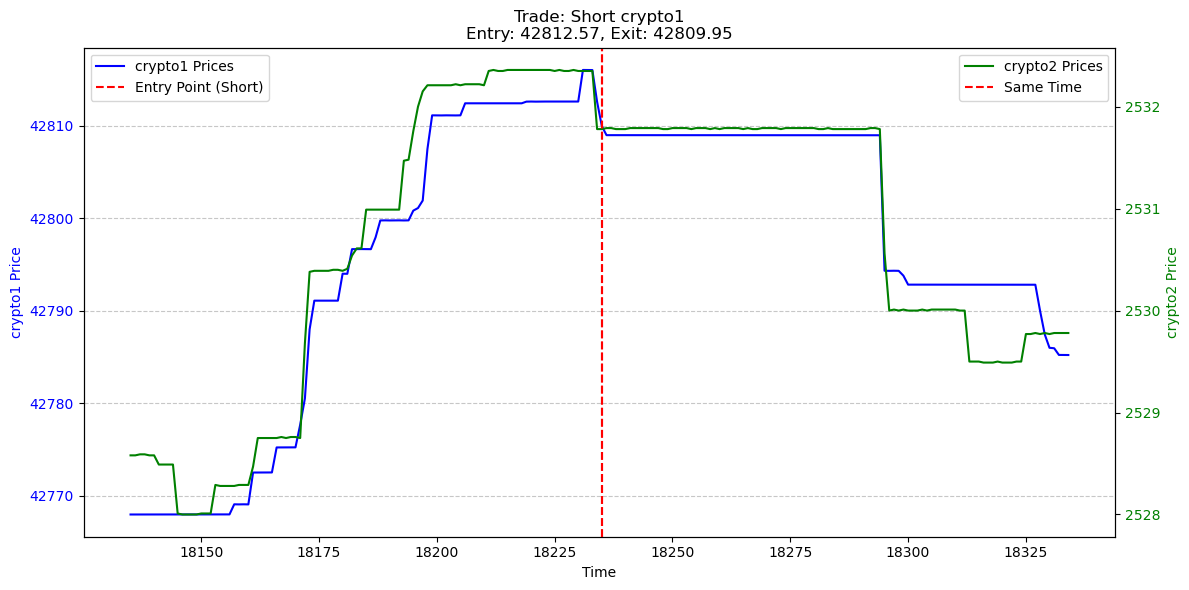

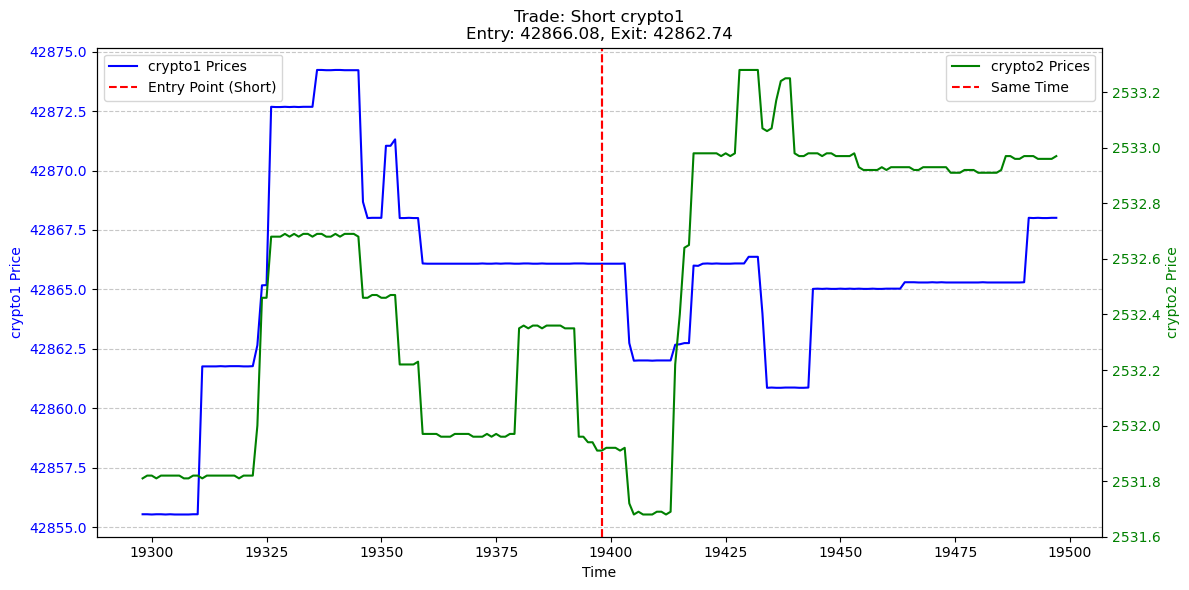

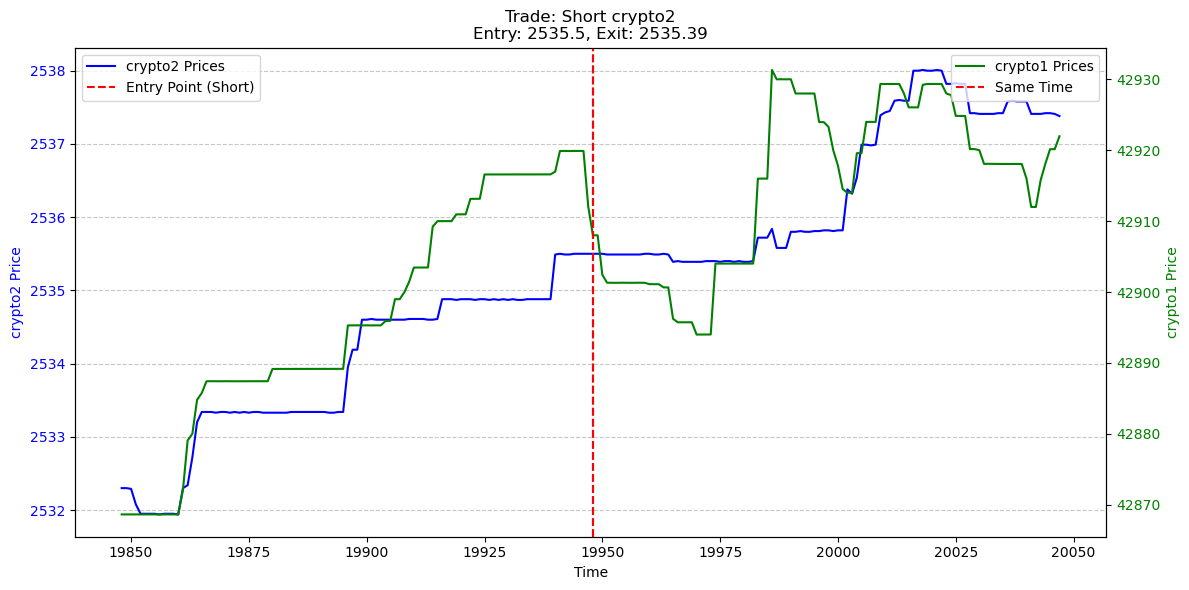

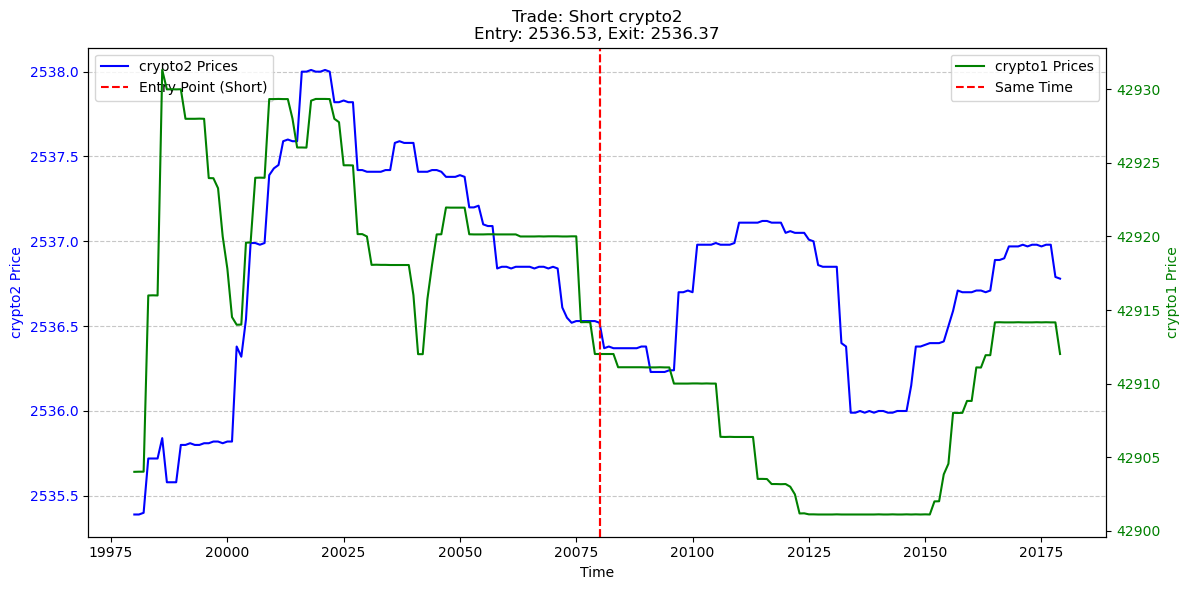

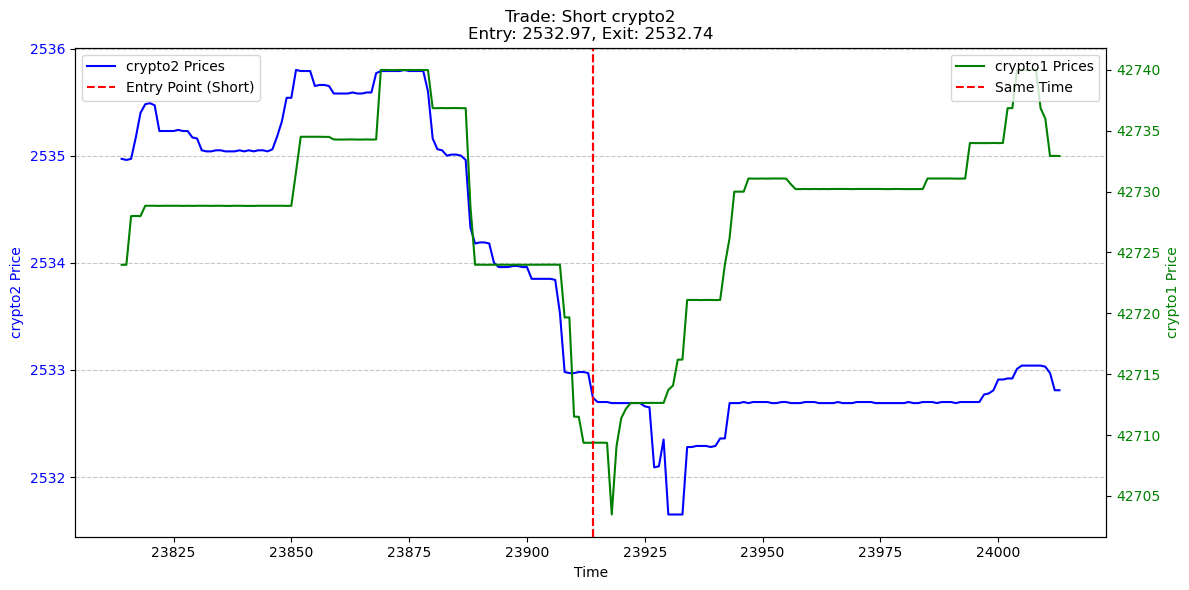

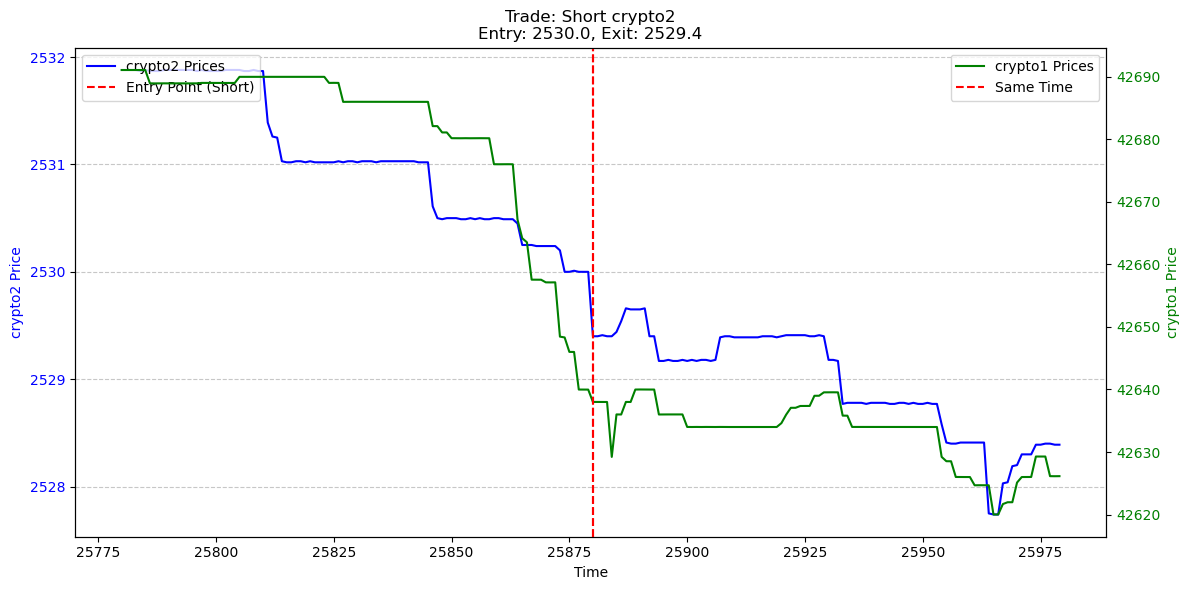

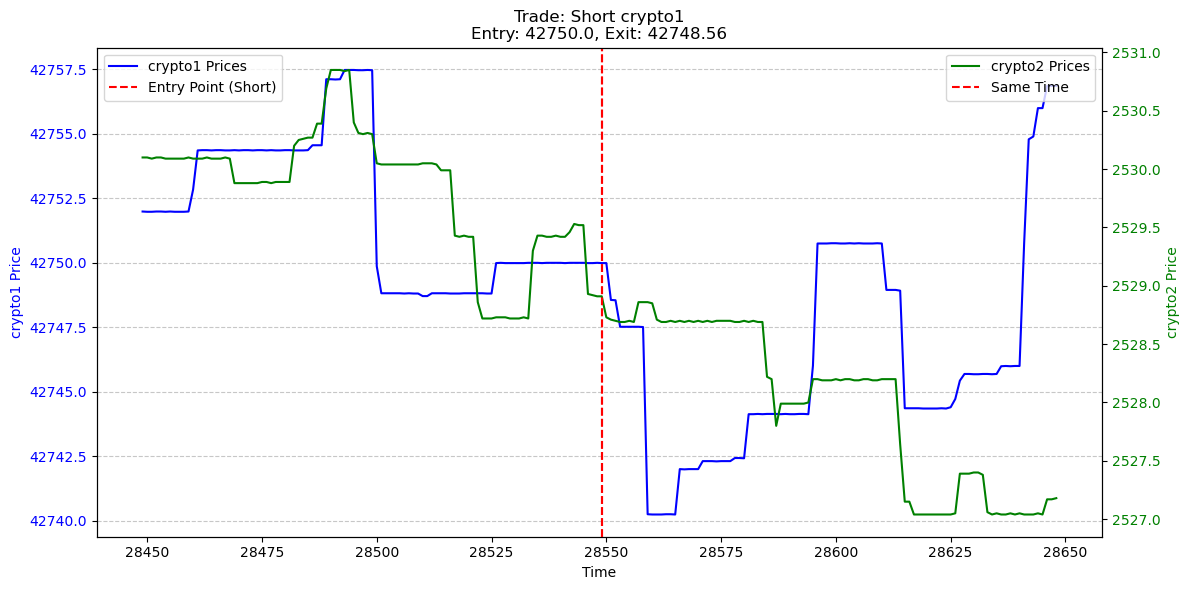

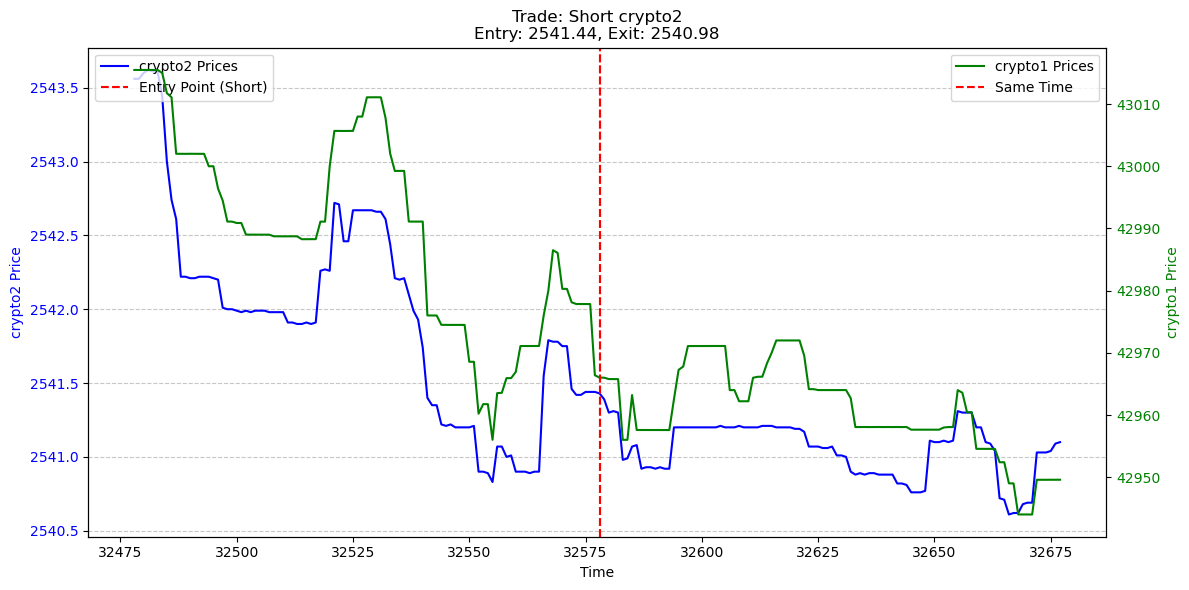

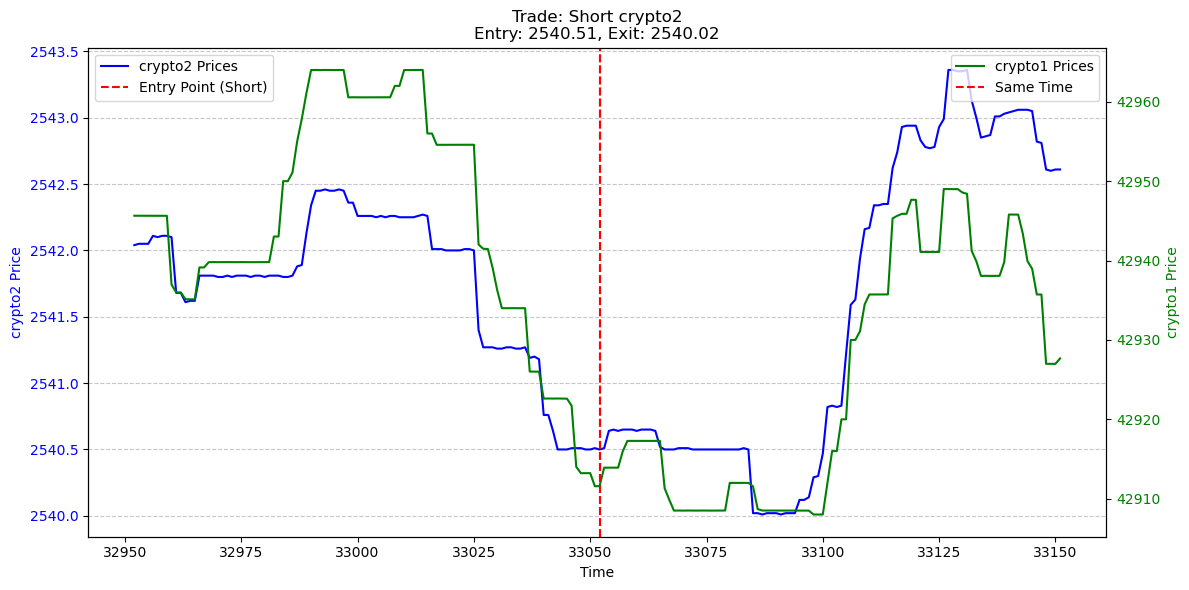

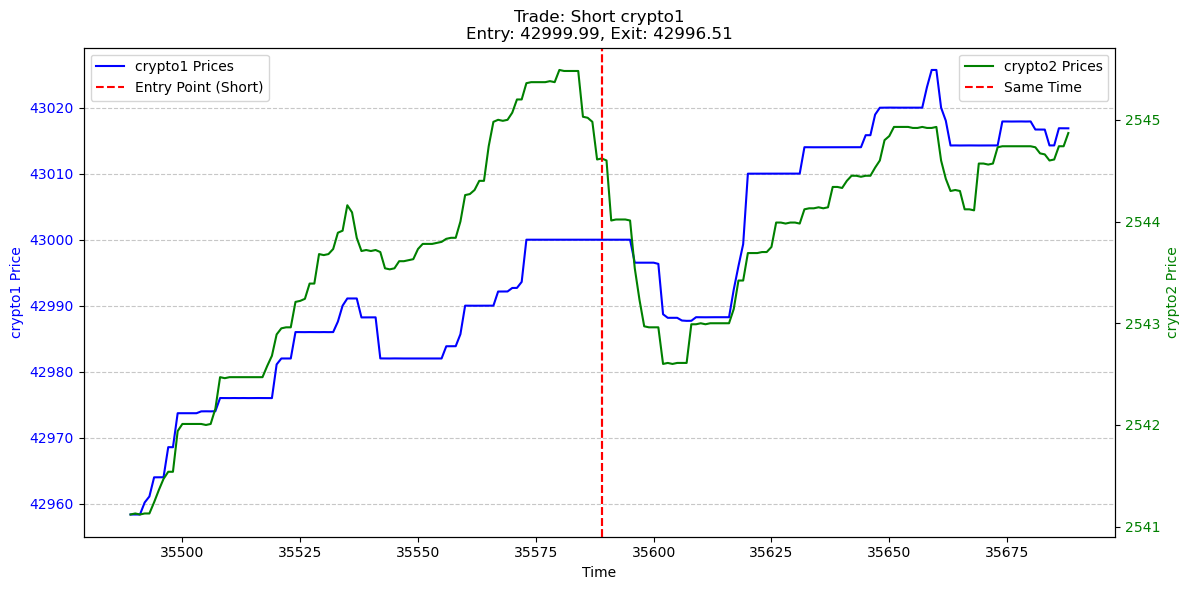

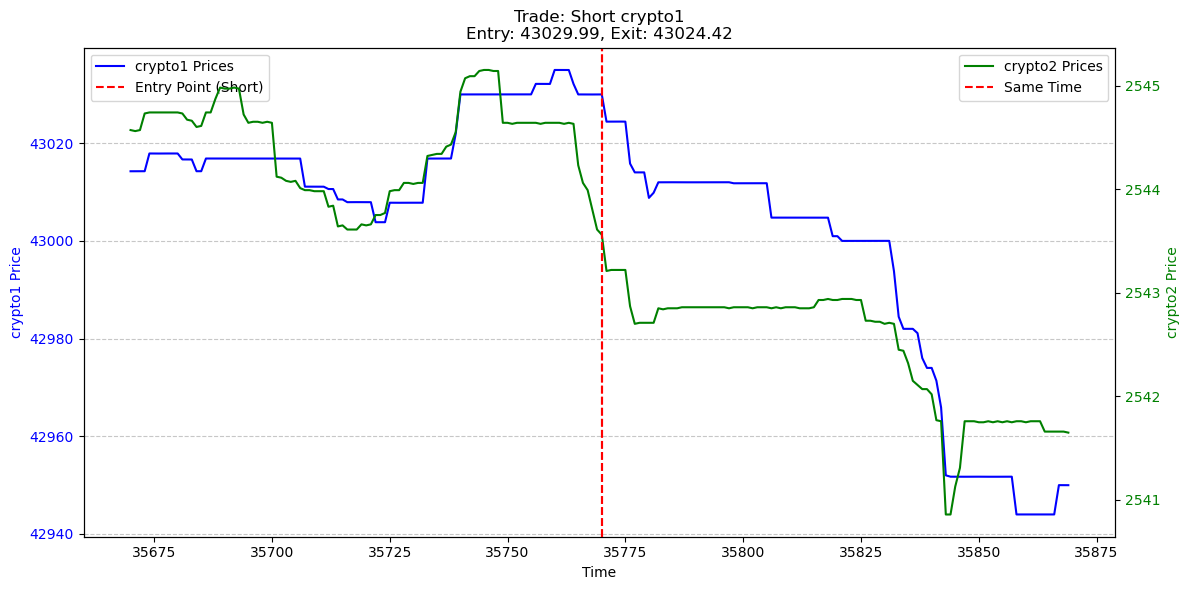

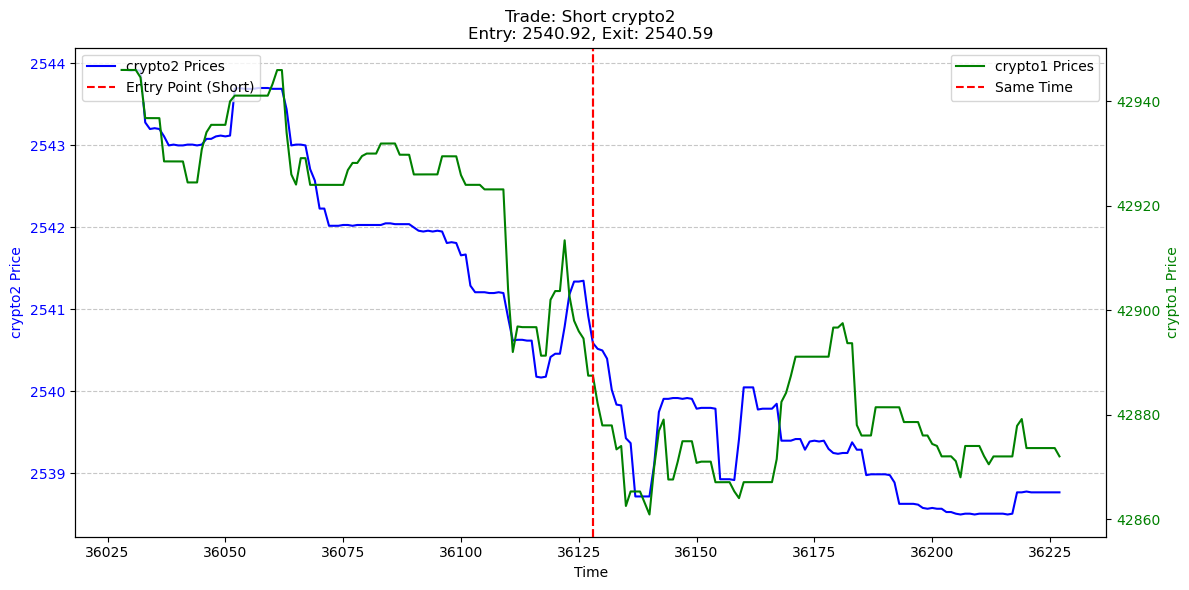

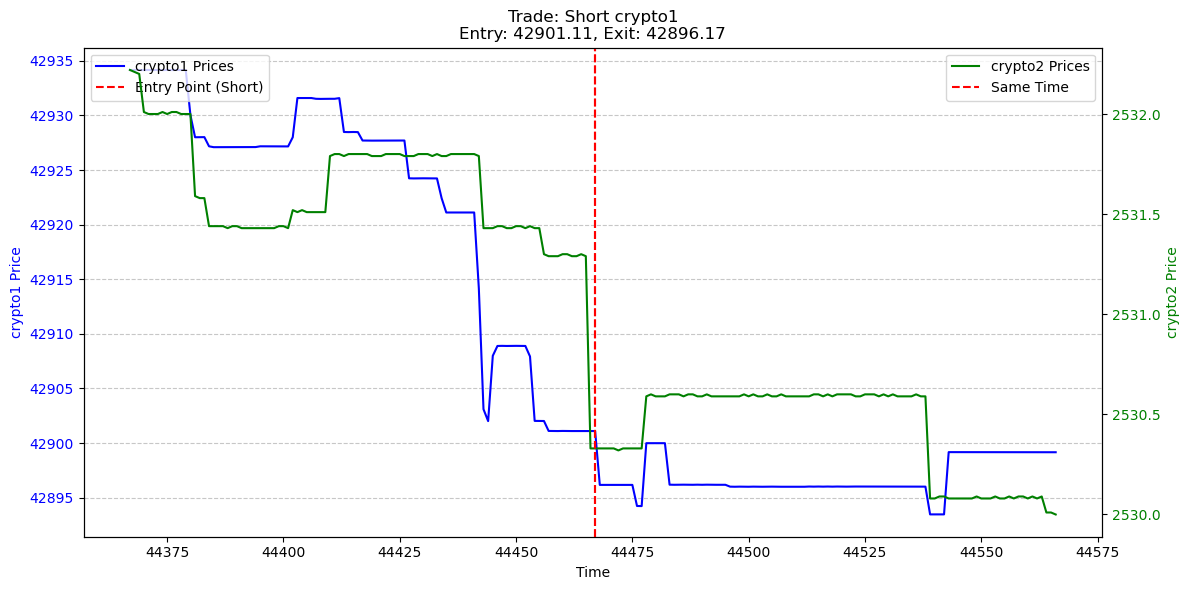

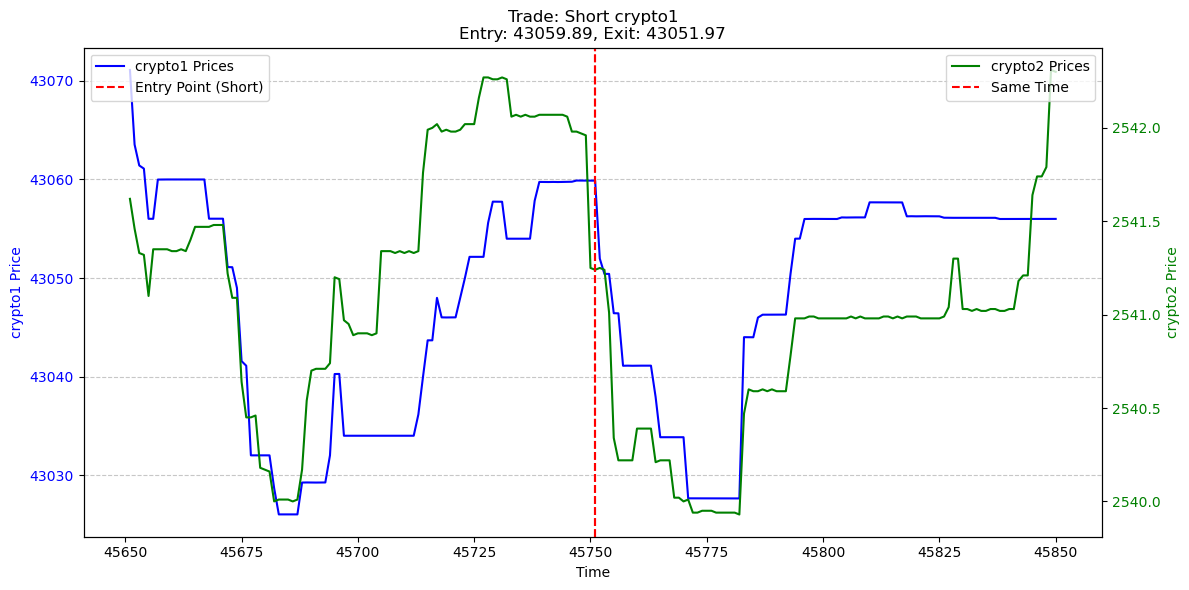

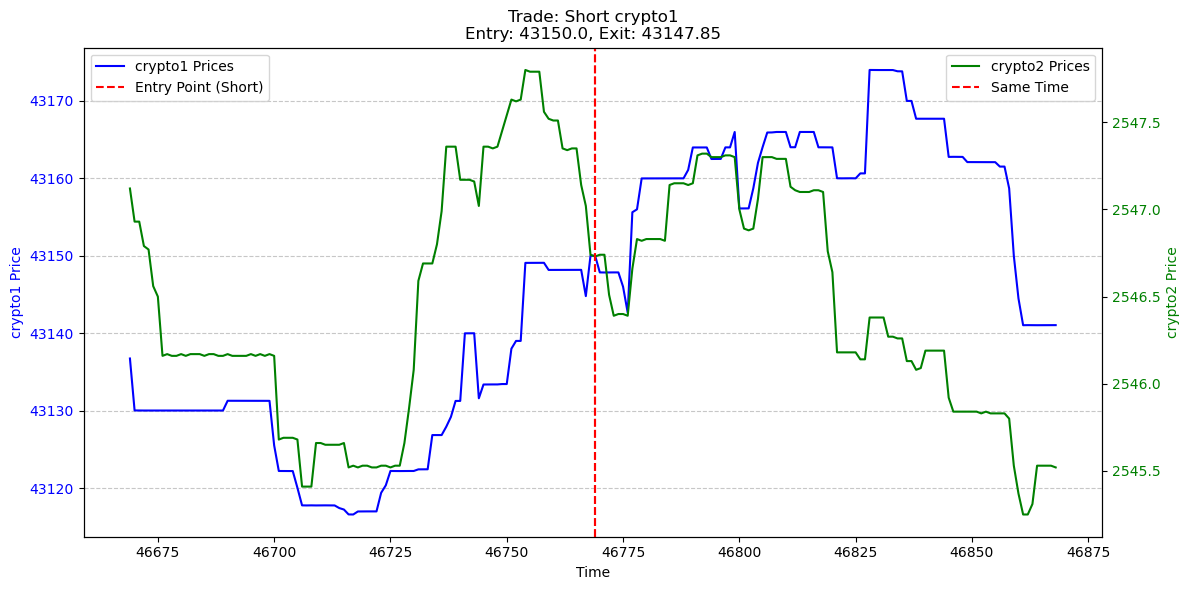

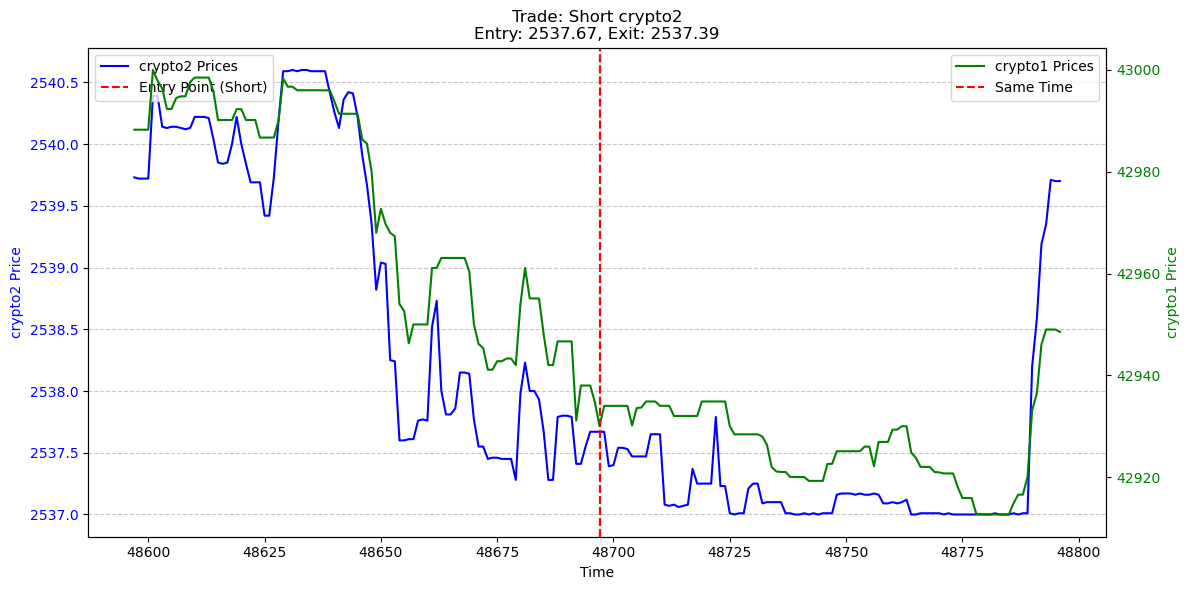

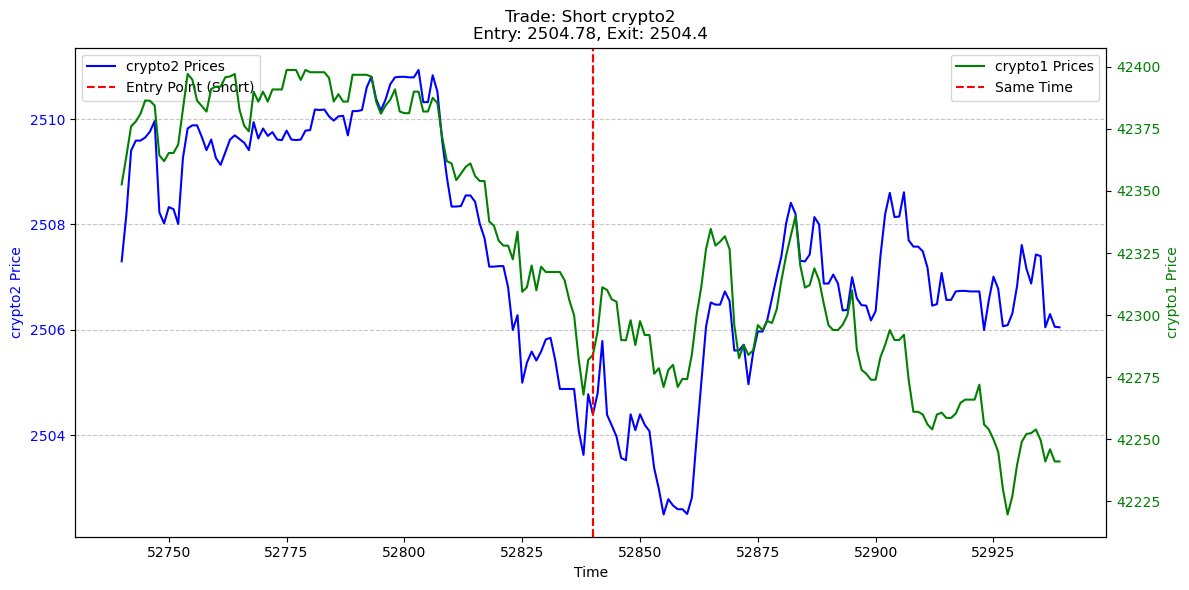

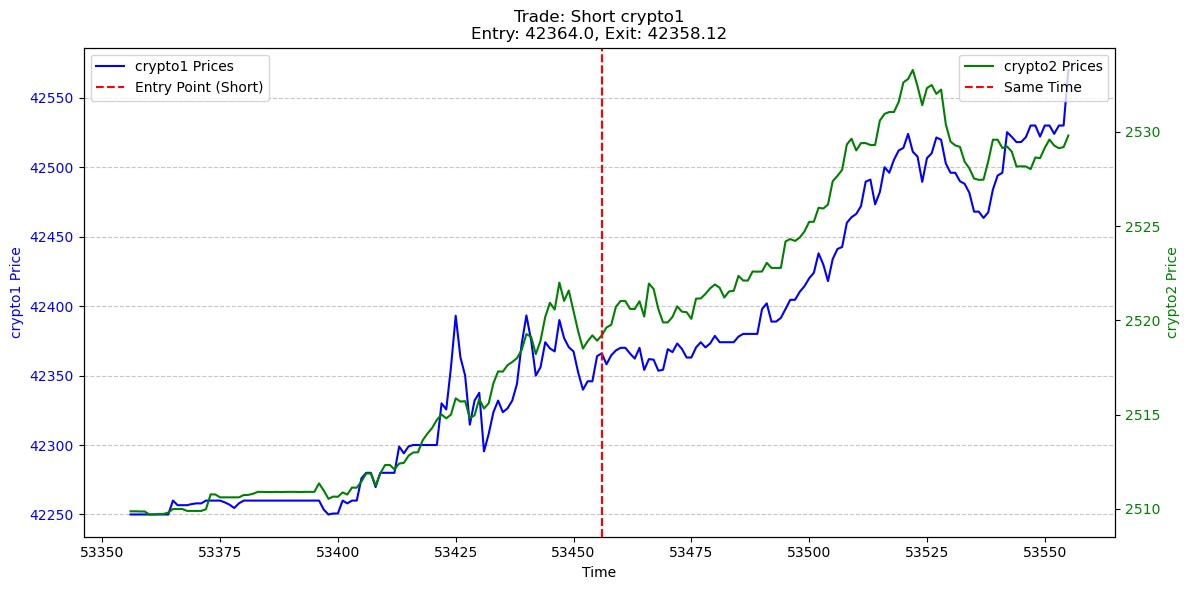

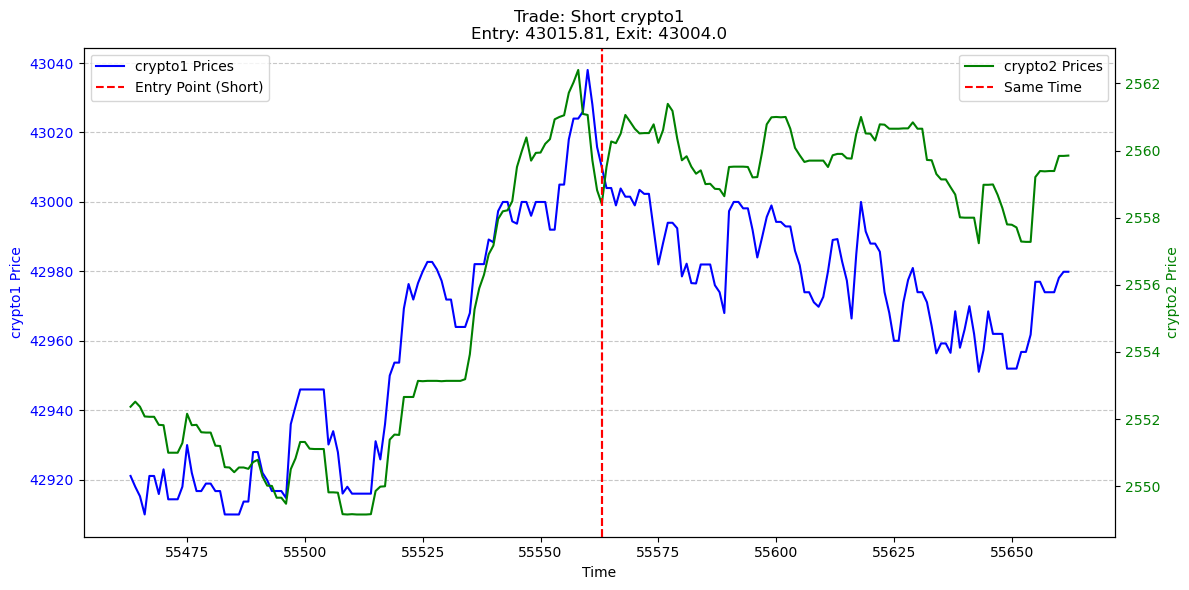

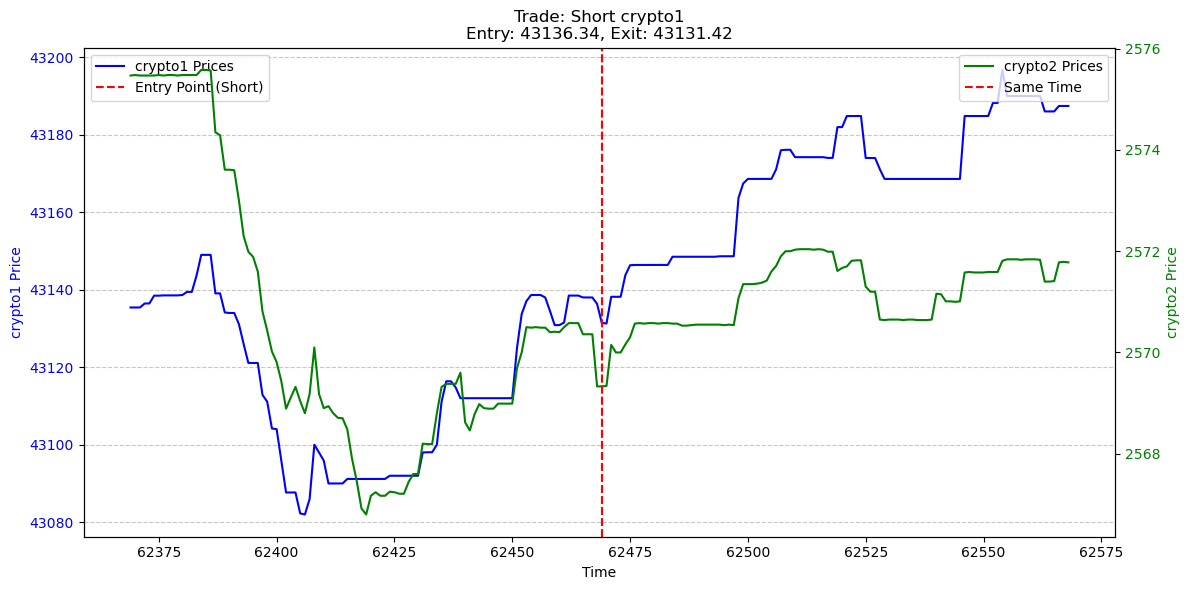

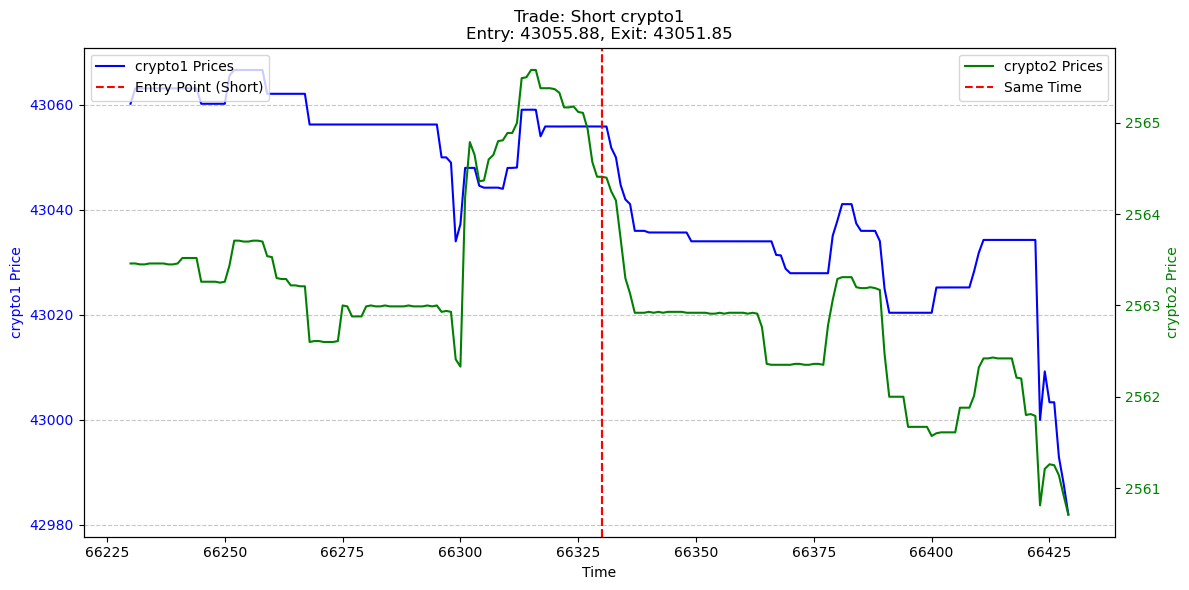

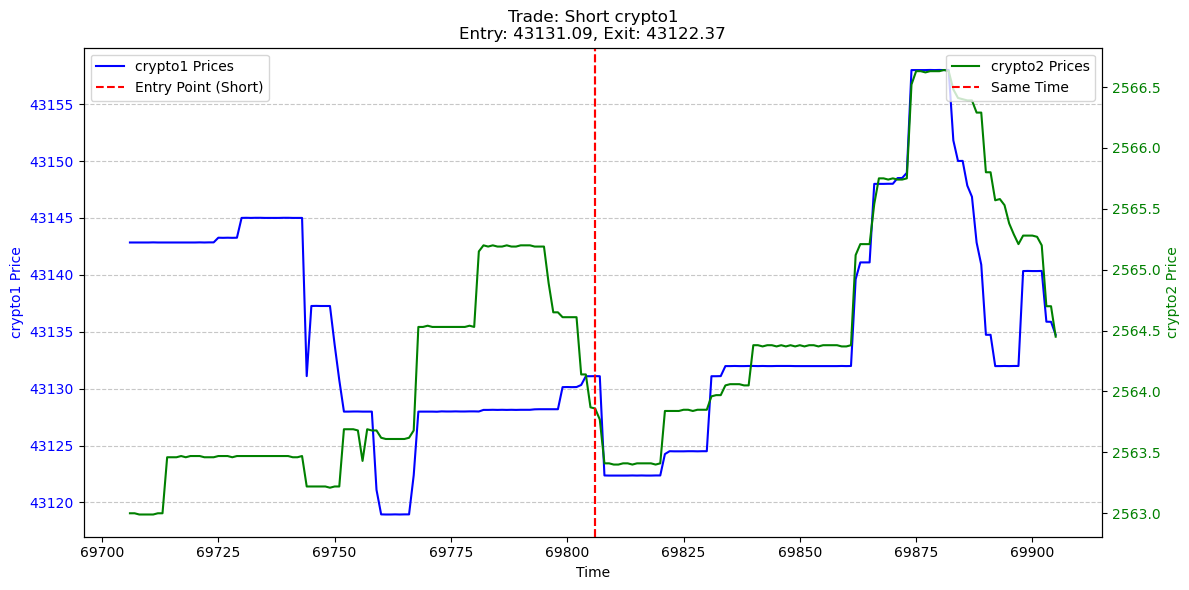

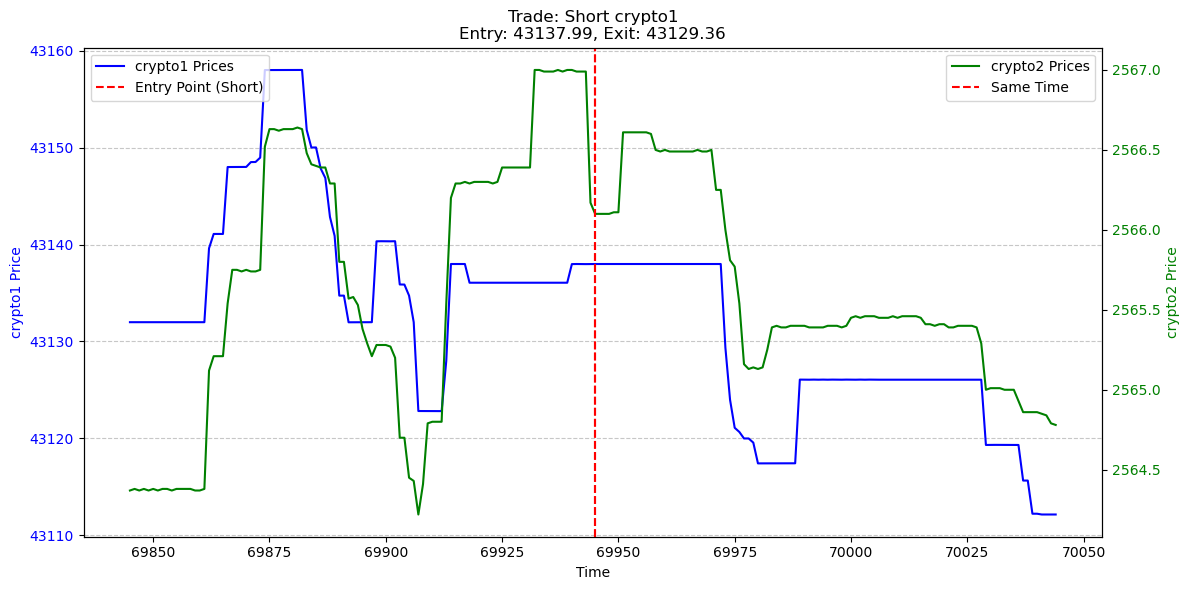

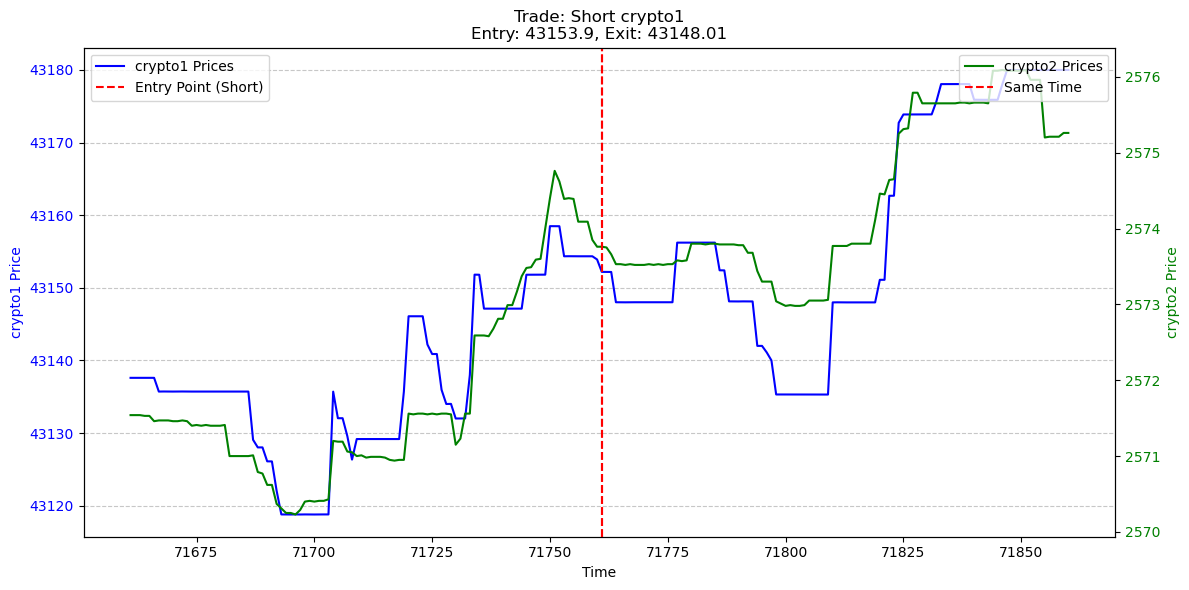

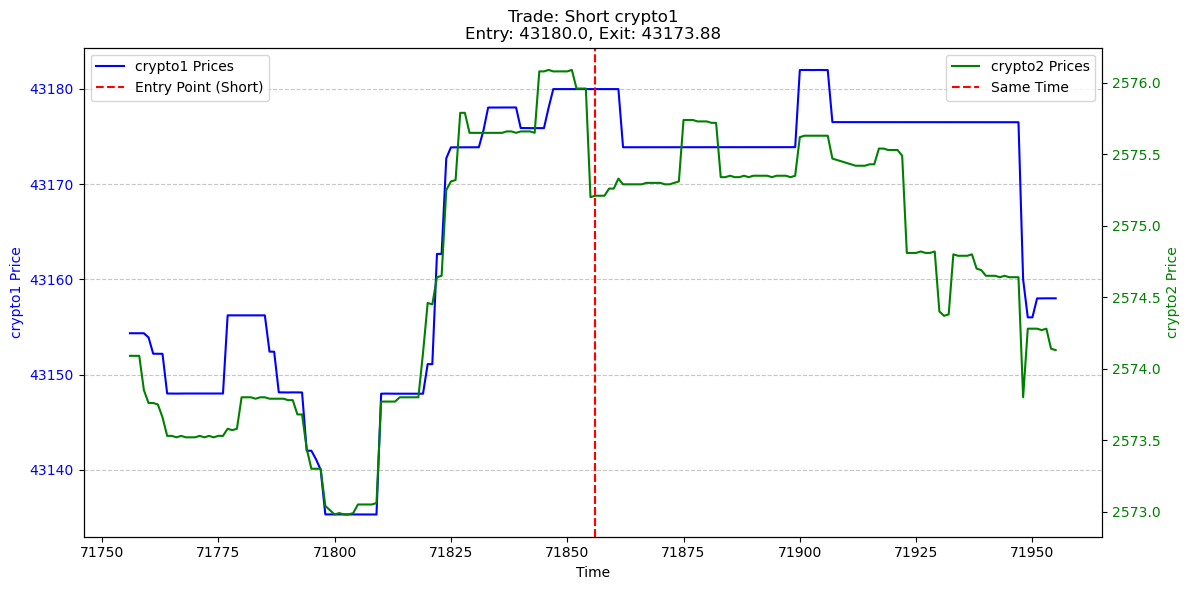

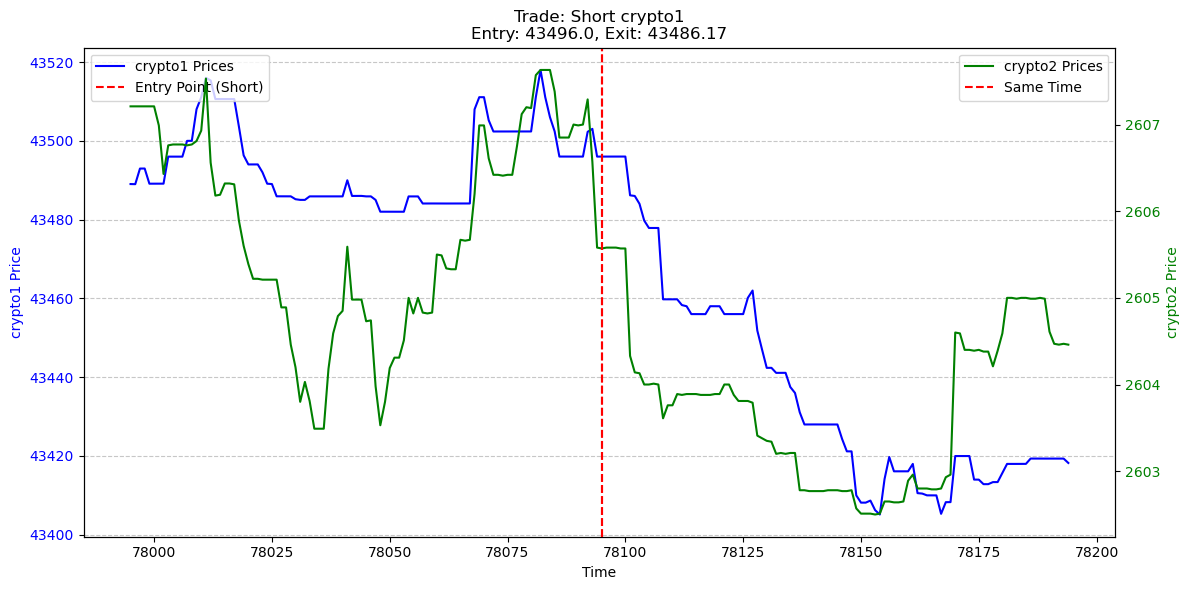

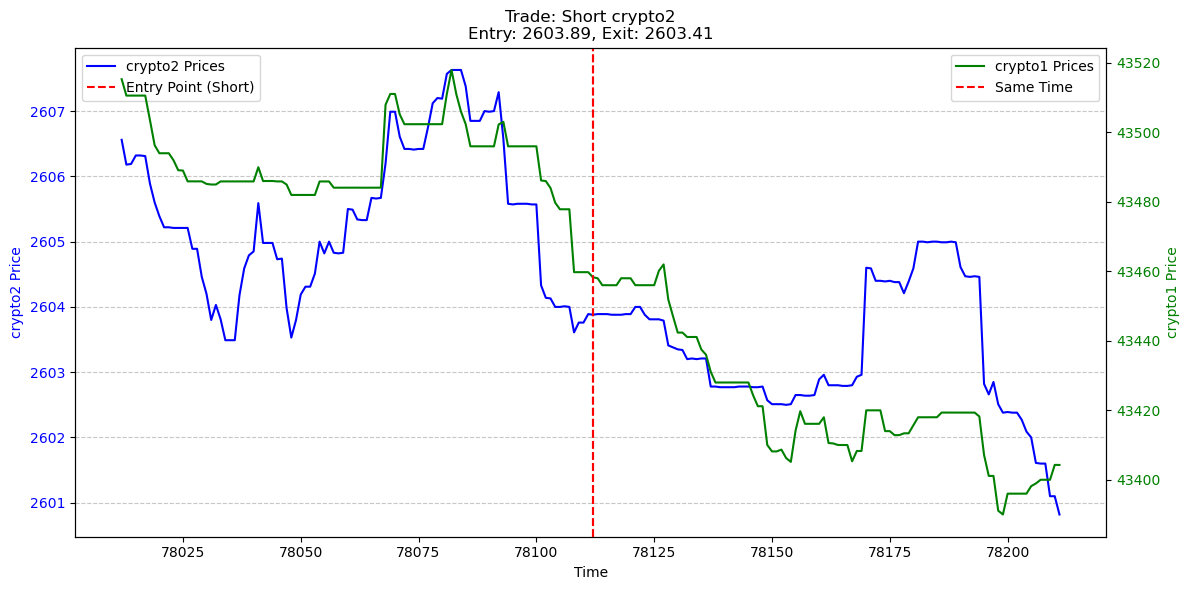

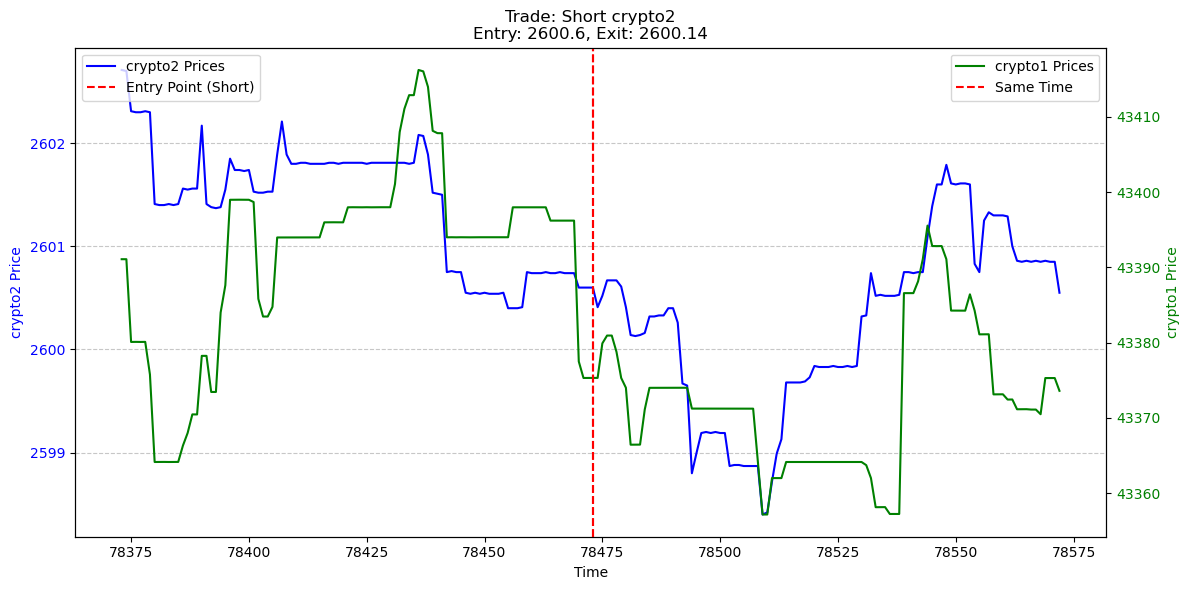

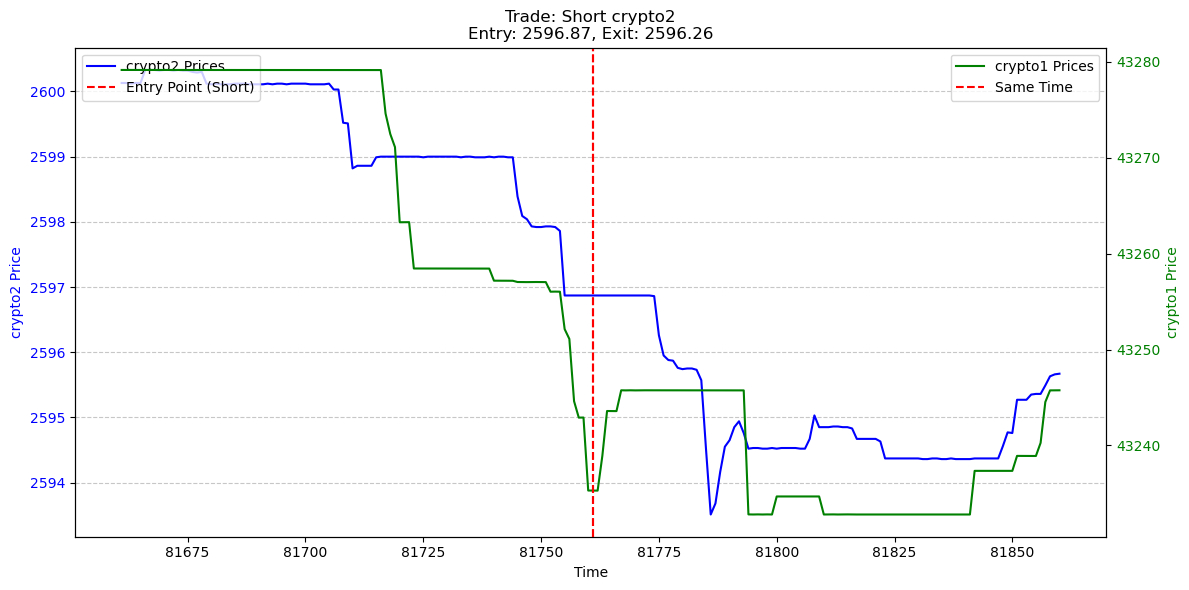

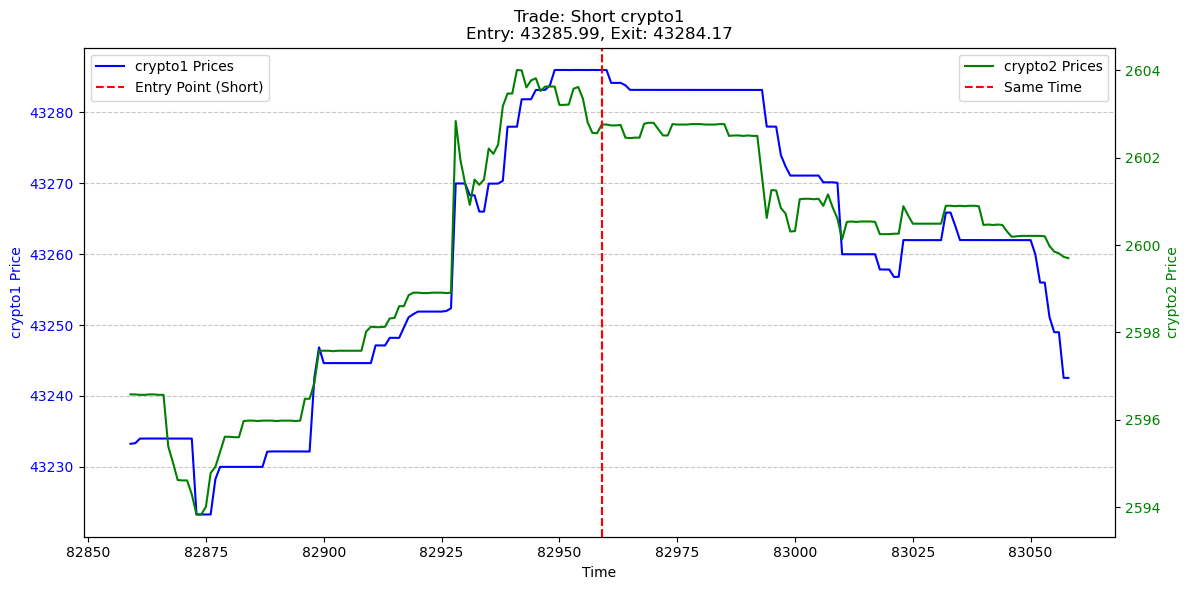

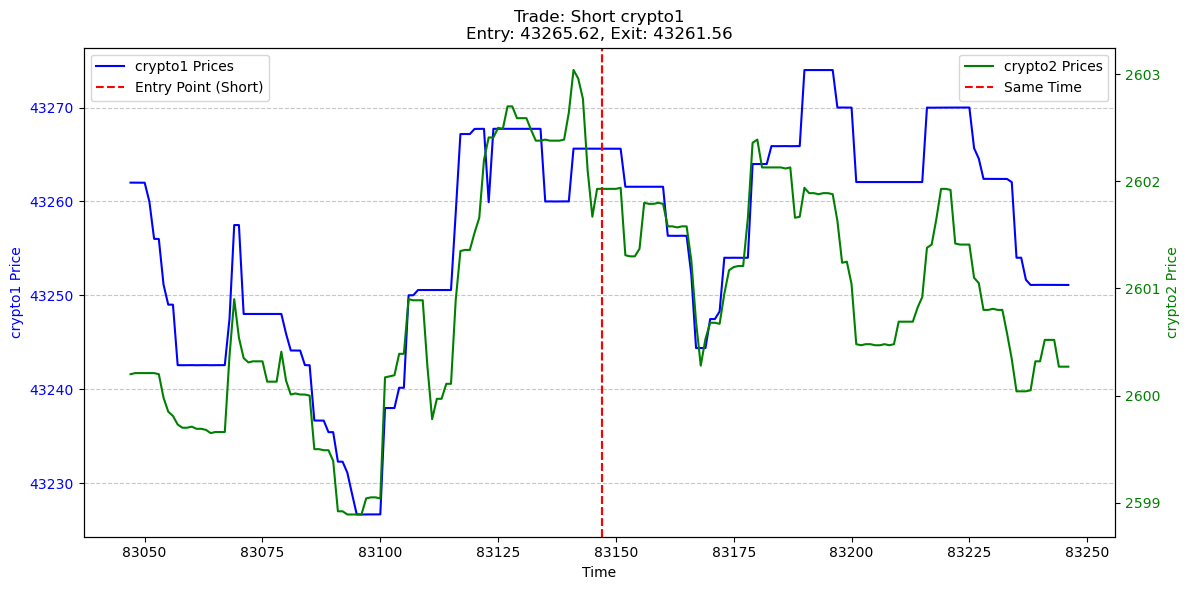

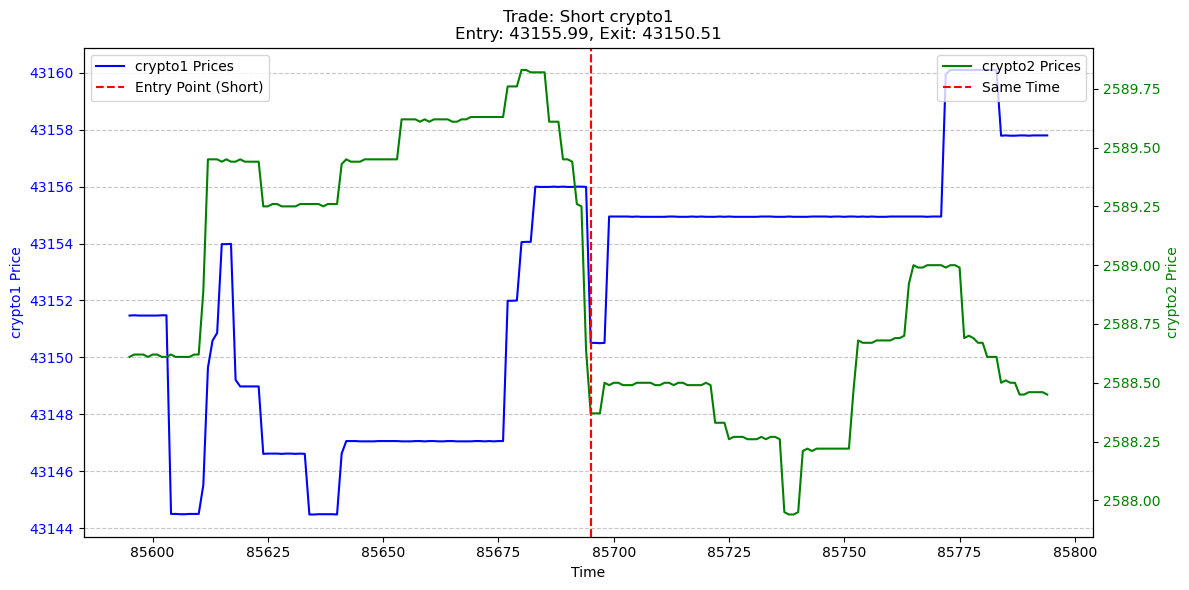

In [14]:
# Re-importing necessary libraries after environment reset
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Regular expression to extract relevant trade data
trade_pattern = re.compile(
    r"(Short|Long) at ([\d.]+)\ni: (\d+), (crypto\d+)_entry_price_(short|long): ([\d.]+), (crypto\d+)_price: ([\d.]+)\n(Bought back at|Sold at) ([\d.]+)"
)

# Define valid_start_idx offset
valid_start_idx = 3605

# Parse log data into structured format
trades = []
for match in trade_pattern.finditer(log_text_1):
    action, entry_price, iteration, crypto1, position_type, crypto_entry_price, crypto2, crypto_price, exit_action, exit_price = match.groups()
    entry_price, iteration, crypto_entry_price, crypto_price, exit_price = map(float, [entry_price, iteration, crypto_entry_price, crypto_price, exit_price])
    
    # Adjust iteration with valid_start_idx offset
    iteration = int(iteration + valid_start_idx)
    
    # Determine if the trade was profitable
    profitable = (action == "Short" and exit_price < entry_price) or (action == "Long" and exit_price > entry_price)
    
    if profitable:
        trades.append({
            "action": action,
            "crypto": crypto1,
            "entry_price": entry_price,
            "exit_price": exit_price,
            "iteration": iteration,
            "position_type": position_type,
        })

# Sort trades by iteration (optional)
trades.sort(key=lambda x: x["iteration"])

# Plot trades with both cryptos on the same graph but using separate y-axes
for trade in trades:
    action = trade["action"]
    crypto_traded = trade["crypto"]
    entry_price = trade["entry_price"]
    exit_price = trade["exit_price"]
    iteration = trade["iteration"]
    
    # Determine which crypto_prices to use for the trade and the other crypto
    if crypto_traded == "crypto1":
        prices_traded = crypto1_prices
        prices_other = crypto2_prices
        other_crypto = "crypto2"
    else:
        prices_traded = crypto2_prices
        prices_other = crypto1_prices
        other_crypto = "crypto1"

    # Define the base time range for plotting
    base_time = max(iteration - 100, 0)
    end_time = iteration + 100

    # Create a plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot for the traded crypto
    ax1.plot(prices_traded.iloc[base_time:end_time], label=f"{crypto_traded} Prices", color="blue")
    ax1.axvline(x=prices_traded.index[iteration], color="red", linestyle="--", label=f"Entry Point ({action})")
    ax1.set_xlabel("Time")
    ax1.set_ylabel(f"{crypto_traded} Price", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a secondary y-axis for the other crypto
    ax2 = ax1.twinx()
    ax2.plot(prices_other.iloc[base_time:end_time], label=f"{other_crypto} Prices", color="green")
    ax2.axvline(x=prices_other.index[iteration], color="red", linestyle="--", label="Same Time")
    ax2.set_ylabel(f"{other_crypto} Price", color="green")
    ax2.tick_params(axis='y', labelcolor="green")

    # Add a title and legend
    plt.title(f"Trade: {action} {crypto_traded}\nEntry: {entry_price}, Exit: {exit_price}")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    # Show the plot
    plt.tight_layout()
    plt.show()


In [15]:
btc_prices_std = (crypto1_prices - crypto1_prices.mean()) / crypto1_prices.std()
eth_prices_std = (crypto2_prices - crypto2_prices.mean()) / crypto2_prices.std()

# Parameters for lag computation
temperature = 0.1
minute = 40
weights = np.exp(np.linspace(0, 2, minute))
weights /= weights.sum()

# Compute the lags for the specified range
base_time = 45750
end_time = base_time + 200
df_avg = []
for i in range(base_time, end_time):
    btc = btc_prices_std.iloc[i:i + minute].values
    eth = eth_prices_std.iloc[i:i + minute].values

    g = partition_function(btc, eth, temperature)
    avg_path = average_path(g)[::2]  # Simplification for down-sampling
    weighted_avg = np.dot(avg_path, weights[:len(avg_path)])  # Adjust weights dynamically
    df_avg.append(weighted_avg)

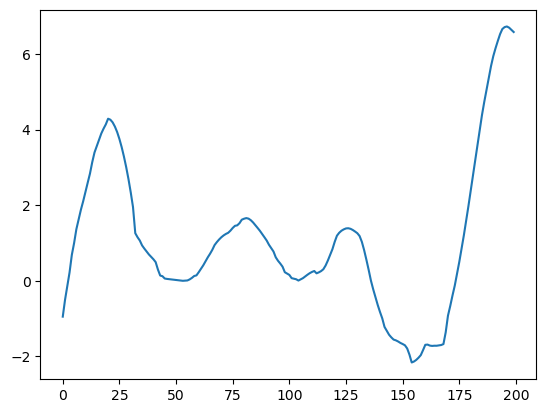

In [16]:
plt.plot(df_avg)

In [17]:
# Defining the specific trade details
specific_trade = {
    "action": "Short",
    "crypto": "crypto1",
    "entry_price": 43059.89,
    "exit_price": 43051.97,
    "iteration": 42146 + 3605  # Adjusting for valid_start_idx
}

# Extracting details for the specific trade
action = specific_trade["action"]
crypto_traded = specific_trade["crypto"]
entry_price = specific_trade["entry_price"]
exit_price = specific_trade["exit_price"]
iteration = specific_trade["iteration"]

# Determine which crypto_prices to use for the trade and the other crypto
if crypto_traded == "crypto1":
    prices_traded = crypto1_prices
    prices_other = crypto2_prices
    other_crypto = "crypto2"
else:
    prices_traded = crypto2_prices
    prices_other = crypto1_prices
    other_crypto = "crypto1"

# Define the base time range for plotting
base_time = max(iteration - 100, 0)
end_time = iteration + 100


# btc_prices_std = (crypto1_prices - crypto1_prices.mean()) / crypto1_prices.std()
# eth_prices_std = (crypto2_prices - crypto2_prices.mean()) / crypto2_prices.std()

# # Parameters for lag computation
# temperature = 0.1
# minute = 40
# weights = np.exp(np.linspace(0, 1.6, minute))
# weights /= weights.sum()
# # Compute the lags for the specified range
# df_avg = []
# for i in range(base_time-minute, end_time-minute):
#     btc = btc_prices_std[i:i + minute].values
#     eth = eth_prices_std[i:i + minute].values

#     g = partition_function(btc, eth, temperature)
#     avg_path = average_path(g)[::2]
#     weighted_avg = np.dot(avg_path, weights[:len(avg_path)])  # Adjust weights dynamically
#     df_avg.append(weighted_avg)

df_avg = df_avg[base_time:end_time]

In [19]:
df_avg

[]

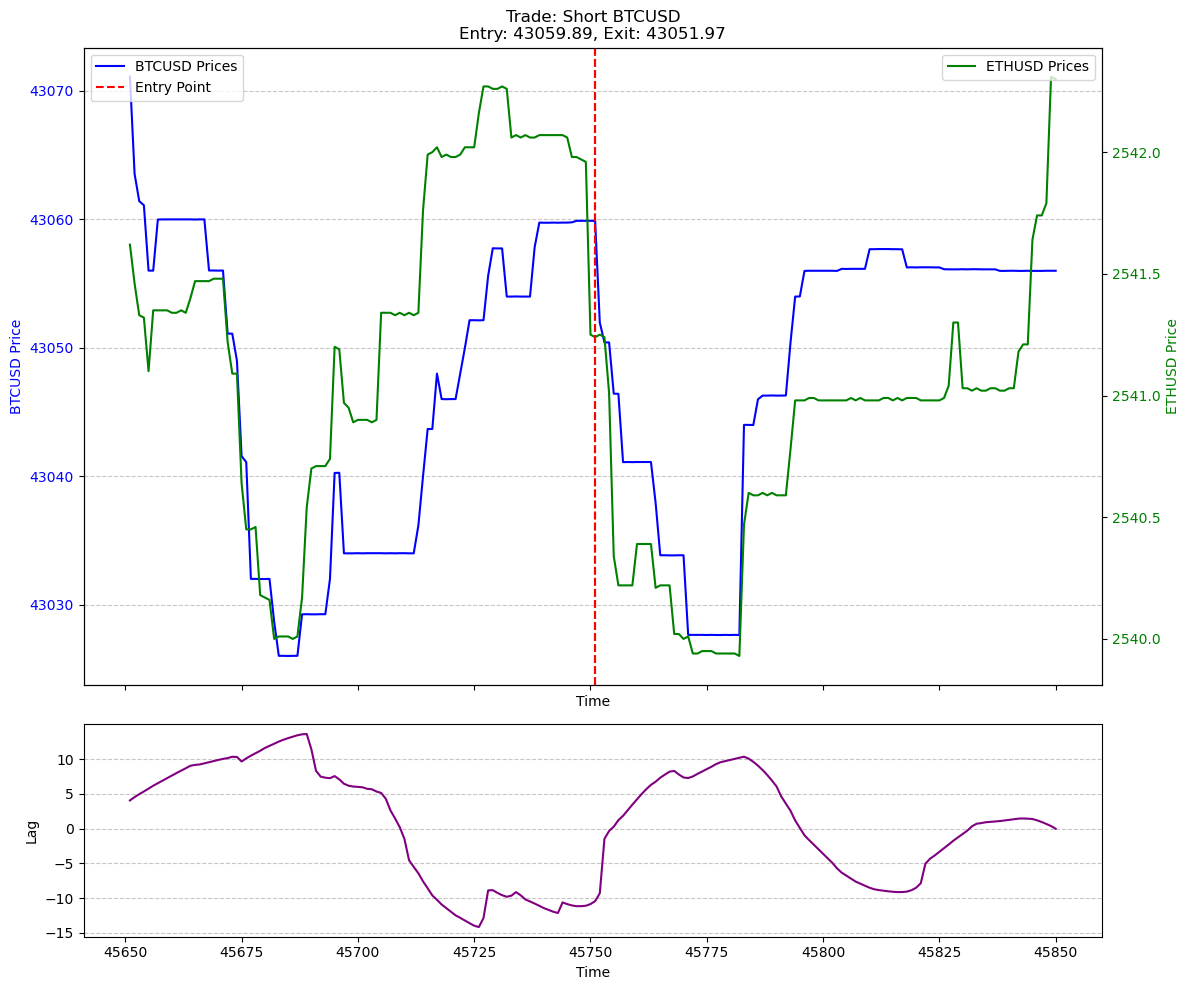

In [42]:
# Updating the plot with "BTCUSD" and "ETHUSD" as y-axis labels

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Top plot for the traded crypto (BTCUSD) and the other crypto (ETHUSD)
ax1.plot(prices_traded.iloc[base_time:end_time], label="BTCUSD Prices", color="blue")
ax1.axvline(x=prices_traded.index[iteration], color="red", linestyle="--", label=f"Entry Point")
ax1.set_xlabel("Time")
ax1.set_ylabel("BTCUSD Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add a secondary y-axis for the other crypto (ETHUSD)
ax1_twin = ax1.twinx()
ax1_twin.plot(prices_other.iloc[base_time:end_time], label="ETHUSD Prices", color="green")
ax1_twin.axvline(x=prices_other.index[iteration], color="red", linestyle="--")
ax1_twin.set_ylabel("ETHUSD Price", color="green")
ax1_twin.tick_params(axis='y', labelcolor="green")

# Add a title and legend for the top plot
ax1.set_title(f"Trade: {action} BTCUSD\nEntry: {entry_price}, Exit: {exit_price}")
ax1.legend(loc="upper left")
ax1_twin.legend(loc="upper right")

# Bottom plot for the lag
lag_index = prices_traded.iloc[base_time:end_time].index  # Adjust index for lag range
ax2.plot(lag_index, df_avg[base_time:end_time], label="Lag", color="purple")
ax2.set_ylabel("Lag")
ax2.set_xlabel("Time")
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Show the combined plot
plt.tight_layout()
plt.show()


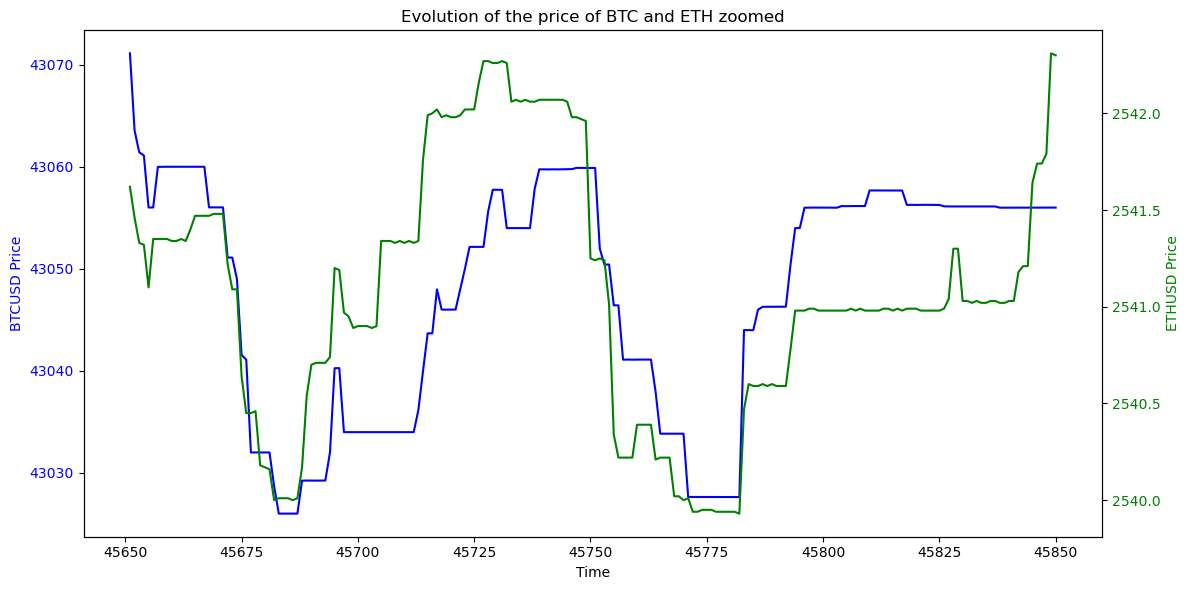

In [51]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for the traded crypto
ax1.plot(prices_traded.iloc[base_time:end_time], label=f"{crypto_traded} Prices", color="blue")
ax1.set_xlabel("Time")
ax1.set_ylabel(f"BTCUSD Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add a secondary y-axis for the other crypto
ax2 = ax1.twinx()
ax2.plot(prices_other.iloc[base_time:end_time], label=f"{other_crypto} Prices", color="green")
ax2.set_ylabel(f"ETHUSD Price", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Add a title and legend
plt.title(f"Evolution of the price of BTC and ETH zoomed")


# Show the plot
plt.tight_layout()
plt.show()

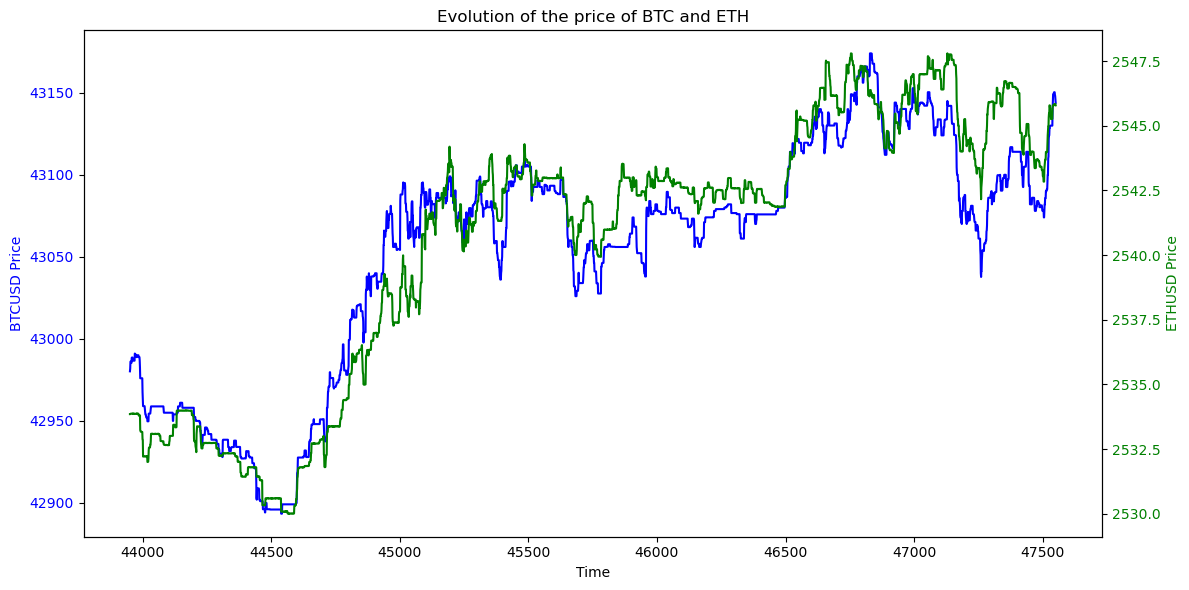

In [50]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot for the traded crypto
ax1.plot(prices_traded.iloc[base_time-1700:end_time+1700], label=f"{crypto_traded} Prices", color="blue")
ax1.set_xlabel("Time")
ax1.set_ylabel(f"BTCUSD Price", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add a secondary y-axis for the other crypto
ax2 = ax1.twinx()
ax2.plot(prices_other.iloc[base_time-1700:end_time+1700], label=f"{other_crypto} Prices", color="green")
ax2.set_ylabel(f"ETHUSD Price", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Add a title and legend
plt.title(f"Evolution of the price of BTC and ETH")


# Show the plot
plt.tight_layout()
plt.show()

In [76]:
btc_prices = crypto1_prices
eth_prices = crypto2_prices
btc_prices_std = standardize(btc_prices)
eth_prices_std = standardize(eth_prices)

temperature = 0.1
minute = 60  
base_time = 17000
total = len(btc_prices_std)
# total = 1

g = partition_function(btc_prices_std[base_time:base_time+300], eth_prices_std[base_time:base_time+300], temperature)
avg_path = average_path(g)[::2]

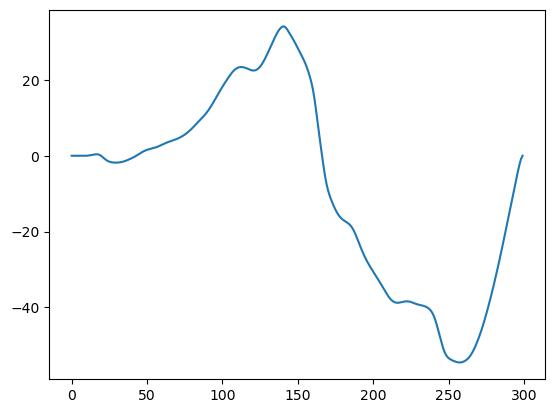

In [77]:
plt.plot(avg_path)

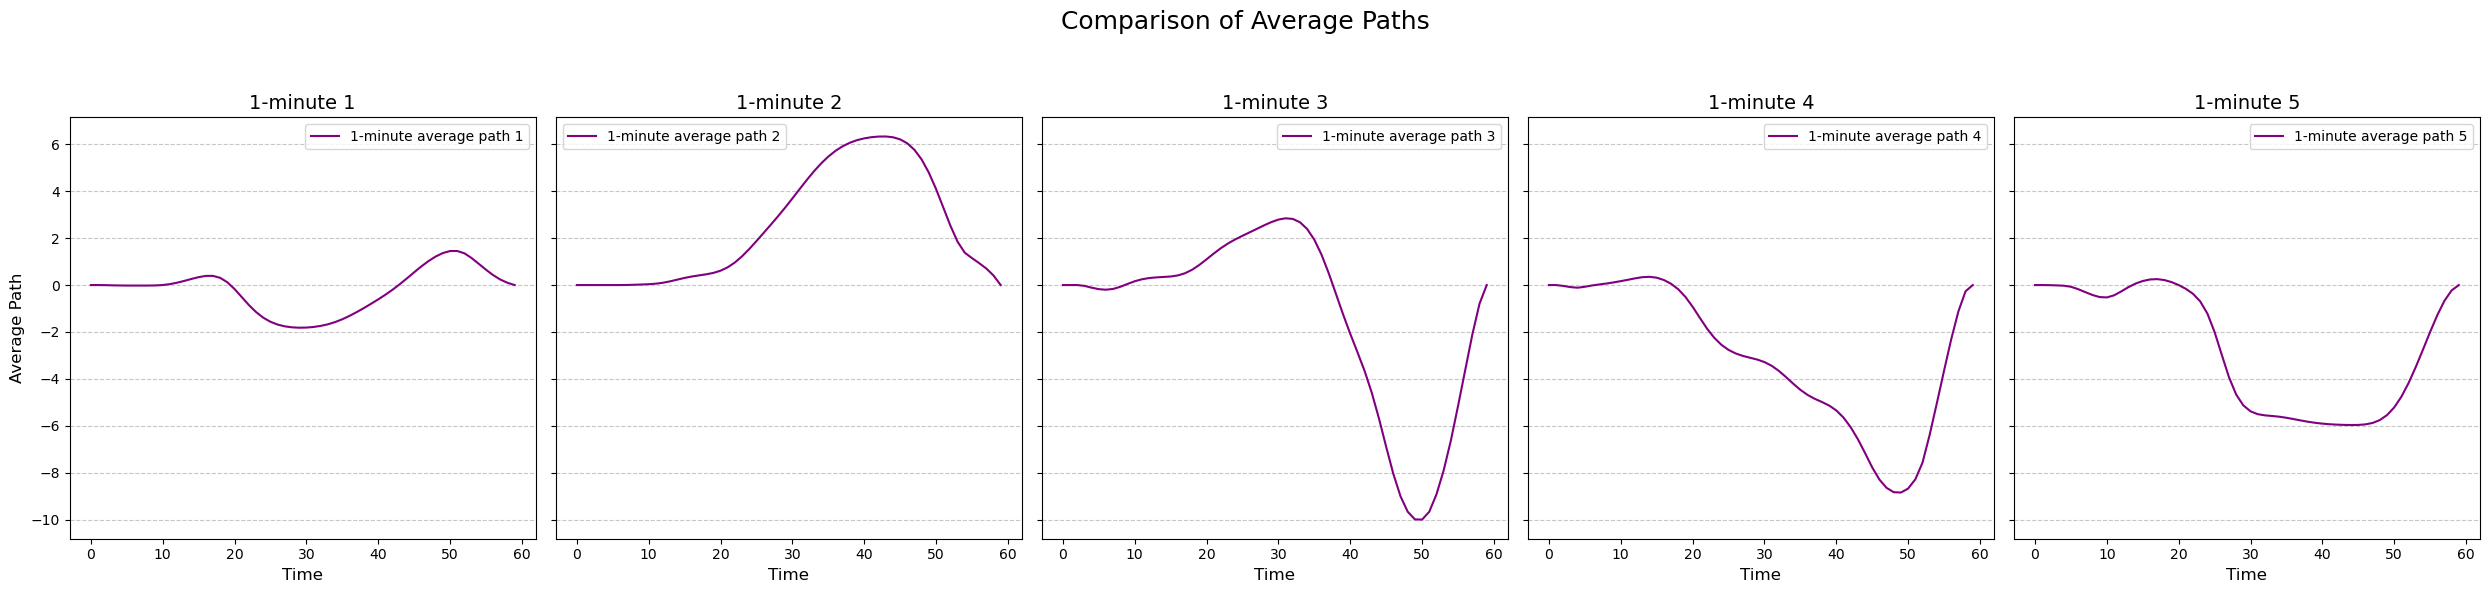

In [82]:
avg_paths_1min = []
for i in range(5):
    base = base_time + i*minute
    g = partition_function(btc_prices_std[base:base+60], eth_prices_std[base:base+60], temperature)
    avg_path = average_path(g)[::2]
    avg_paths_1min.append(avg_path)


# Create a new plot with 5 subplots in a single row for the 1-minute average paths
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)  # Increased size for better visibility

fig.suptitle("Comparison of Average Paths", fontsize=18)
for i, avg_path in enumerate(avg_paths_1min):
    axes[i].plot(avg_path, color="purple", label=f"1-minute average path {i + 1}")
    axes[i].set_title(f"1-minute {i + 1}", fontsize=14)
    axes[i].set_xlabel("Time", fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    if i == 0:
        axes[i].set_ylabel("Average Path", fontsize=12)
    axes[i].legend(fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust layout to include the title
plt.show()
